# APPLIED AI IN *BIOMEDICINE*

## SETUP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /path_to_folder/train

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/AppliedAI/projectHeart/train


In [ ]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.15.0


In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler

## IMPORT DATA

In [ ]:
import scipy.io
# Load MATLAB file
mat_file = scipy.io.loadmat('S057_128.mat')

# Access data from the MATLAB file
# For example, if your MATLAB file contains a variable named 'data', you can access it like this:
#data = mat_file['ppg']

# Print the data
print(type(mat_file))
print(mat_file)

<class 'dict'>
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACA64, Created on: Tue Nov  7 09:57:37 2023', '__version__': '1.0', '__globals__': [], 'ppg': array([[-2.69036   ],
       [-2.69031554],
       [-2.69026462],
       ...,
       [ 6.70135321],
       [ 7.0942836 ],
       [ 7.03416793]])}


In [ ]:
import os
import scipy.io
import numpy as np
cartella = os.getcwd()  # Ottieni il percorso corrente
files = os.listdir(cartella)

# Inizializza una lista
ppg_list_250=[]
ppg_list_250_ann=[]
ppg_list_250_speaks=[]

ppg_list_128 =[]
ppg_list_128_ann=[]
ppg_list_128_speaks=[]

for file in files:
    if '250.mat' in file:
        mat_file = scipy.io.loadmat(file)
        # Estrai i dati dal file e aggiungili all'array
        ppg_signal = mat_file['ppg']
        ppg_list_250.append(ppg_signal)
        # Load peaks corresponding to ppg
        mat_file = scipy.io.loadmat(file.replace('.mat', '_spk.mat'))
        speaks = mat_file['speaks']
        ppg_list_250_speaks.append(speaks)
        # Load annotations corresponding to ppg
        mat_file = scipy.io.loadmat(file.replace('.mat', '_ann.mat'))
        speaks = mat_file['labels']
        ppg_list_250_ann.append(speaks)

    if '128.mat' in file:
        mat_file = scipy.io.loadmat(file)
        # Estrai i dati dal file e aggiungili all'array
        ppg_signal = mat_file['ppg']
        ppg_list_128.append(ppg_signal)
        # Load peaks corresponding to ppg
        mat_file = scipy.io.loadmat(file.replace('.mat', '_spk.mat'))
        speaks = mat_file['speaks']
        ppg_list_128_speaks.append(speaks)
        # Load annotations corresponding to ppg
        mat_file = scipy.io.loadmat(file.replace('.mat', '_ann.mat'))
        speaks = mat_file['labels']
        ppg_list_128_ann.append(speaks)


In [ ]:
print("****************PATIENTS WITH 250 SAMPLE FREQUENCY:***********************")
print(f"Number of PPG signals arrays: {len(ppg_list_250)}")
print(f"Number of Speaks arrays: {len(ppg_list_250_speaks)}")
print(f"Number of Annotations arrays: {len(ppg_list_250_ann)}")
print(f"Length of signal 0: {len(ppg_list_250[0])}")
print(f"Length of speaks array[0]: {len(ppg_list_250_speaks[0])}")
print(f"Length of annotation speaks array[0]: {len(ppg_list_250_ann[0])}")
print(f"Examples of ppg_list_250_speaks[39][830:840]: {ppg_list_250_speaks[39][830:840]}")
print(f"Examples of ppg_list_250_ann[39][830:840]:{ppg_list_250_ann[39][830:840]}")

****************PATIENTS WITH 250 SAMPLE FREQUENCY:***********************
Number of PPG signals arrays: 43
Number of Speaks arrays: 43
Number of Annotations arrays: 43
Length of signal 0: 450000
Length of speaks array[0]: 2314
Length of annotation speaks array[0]: 2314
Examples of ppg_list_250_speaks[39][830:840]: [[179011]
 [179202]
 [179396]
 [179588]
 [179783]
 [394959]
 [215440]
 [215602]
 [215817]
 [216004]]
Examples of ppg_list_250_ann[39][830:840]:['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']


In [ ]:
print("****************PATIENTS WITH 128 SAMPLE FREQUENCY:***********************")
print(f"Number of PPG signals arrays: {len(ppg_list_128)}")
print(f"Number of Speaks arrays: {len(ppg_list_128_speaks)}")
print(f"Number of Annotations arrays: {len(ppg_list_128_ann)}")
print(f"Length of signal 0: {len(ppg_list_128[0])}")
print(f"Length of speaks array[0]: {len(ppg_list_128_speaks[0])}")
print(f"Length of annotation speaks array[0]: {len(ppg_list_128_ann[0])}")
print(f"Examples of ppg_list_128_speaks[39][830:840]: {ppg_list_128_speaks[39][830:840]}")
print(f"Examples of ppg_list_128_ann[39][830:840]:{ppg_list_128_ann[39][830:840]}")

****************PATIENTS WITH 128 SAMPLE FREQUENCY:***********************
Number of PPG signals arrays: 62
Number of Speaks arrays: 62
Number of Annotations arrays: 62
Length of signal 0: 230295
Length of speaks array[0]: 1932
Length of annotation speaks array[0]: 1932
Examples of ppg_list_128_speaks[39][830:840]: [[111423]
 [111558]
 [111695]
 [111826]
 [111959]
 [112098]
 [112230]
 [112363]
 [112502]
 [112634]]
Examples of ppg_list_128_ann[39][830:840]:['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'V']


I segnali di freq=250 sono tutti lunghi 450000.

I segnali di freq=128 sono piu o meno lunghi tutti 230300. (vedi distribuzione boxplot)


[230295, 230293, 230289, 230315, 230285, 230323, 230312, 230279, 230308, 230270, 230345, 230323, 230334, 230090, 230333, 230261, 230374, 230299, 230292, 230382, 230355, 230309, 230341, 230317, 230401, 230420, 230158, 230388, 230285, 230443, 230264, 230209, 230270, 230371, 230346, 230335, 230213, 230277, 230312, 230297, 230332, 230458, 230356, 230359, 230289, 230371, 230342, 230334, 230435, 230312, 230162, 230379, 230235, 230426, 230206, 230400, 230361, 230288, 230311, 230356, 230402, 230373]


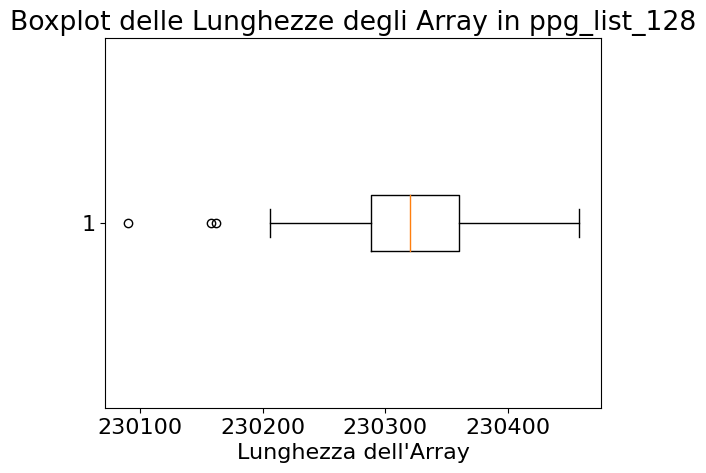

In [ ]:
# Calcola le lunghezze di ciascun array
lunghezze_array = [len(arr) for arr in ppg_list_128]
print(lunghezze_array)
# # Creazione del grafico a barre
# plt.bar(range(len(ppg_list_128)), lunghezze_array, color='blue')
# plt.title('Lunghezza di ciascun Array in ppg_list_128')
# plt.xlabel('Indice dell\'Array')
# plt.ylabel('Lunghezza dell\'Array')
# plt.show()

# Creazione del boxplot
plt.boxplot(lunghezze_array, vert=False)
plt.title('Boxplot delle Lunghezze degli Array in ppg_list_128')
plt.xlabel('Lunghezza dell\'Array')
plt.show()

[2314, 2729, 2566, 2025, 2556, 2957, 591, 1831, 1982, 2358, 2413, 2114, 2585, 2395, 2166, 2168, 3207, 2192, 2448, 2073, 2368, 2761, 2191, 2409, 2088, 2565, 1867, 1878, 1577, 2914, 3037, 2412, 1847, 2505, 1870, 2218, 1851, 2428, 1938, 1890, 3509, 2298, 2262]


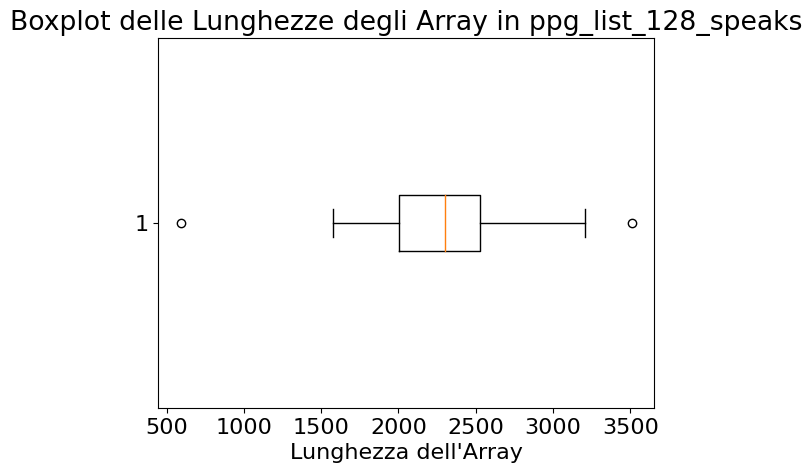

In [ ]:
# Calcola le lunghezze di ciascun array
lunghezze_array = [len(arr) for arr in ppg_list_250_ann]
print(lunghezze_array)
# # Creazione del grafico a barre
# plt.bar(range(len(ppg_list_128)), lunghezze_array, color='blue')
# plt.title('Lunghezza di ciascun Array in ppg_list_128')
# plt.xlabel('Indice dell\'Array')
# plt.ylabel('Lunghezza dell\'Array')
# plt.show()

# Creazione del boxplot
plt.boxplot(lunghezze_array, vert=False)
plt.title('Boxplot delle Lunghezze degli Array in ppg_list_128_speaks')
plt.xlabel('Lunghezza dell\'Array')
plt.show()

array 0 e 39 di ppg_list_250_speaks non sono in ordine crescente.

ppg_list_128_speaks è in ordine crescente

In [ ]:
# Verifica e stampa se i numeri sono in ordine crescente per ciascun array
for i, array in enumerate(ppg_list_250_speaks):
    is_in_ordine_crescente = all(array[j] <= array[j + 1] for j in range(len(array) - 1))

    if is_in_ordine_crescente:
        pass
        #print(f"L'array {i} è in ordine crescente.")
    else:
        print(f"L'array {i} non è in ordine crescente.")

L'array 6 non è in ordine crescente.
L'array 39 non è in ordine crescente.


PROVVISORIO: elimino gli array 0 e 39 che non sono in ordine crescente

[imp: farlo per tutte e tre le liste]

In [ ]:
# Crea una nuova lista contenente solo gli array in ordine crescente e aggiorna le altre due liste
ppg_list_250, ppg_list_250_speaks, ppg_list_250_ann = zip(*[(list_250, list_speaks, list_ann) for list_250, list_speaks, list_ann in zip(ppg_list_250, ppg_list_250_speaks, ppg_list_250_ann) if all(list_speaks[j] <= list_speaks[j + 1] for j in range(len(list_speaks) - 1))])

# Converti  da tupla a lista
ppg_list_250 = list(ppg_list_250)
ppg_list_250_speaks = list(ppg_list_250_speaks)
ppg_list_250_ann = list(ppg_list_250_ann)

# Stampa la lunghezza delle nuove liste dopo la rimozione
print(len(ppg_list_250_speaks))
print(len(ppg_list_250))
print(len(ppg_list_250_ann))


41
41
41


## UPSAMPLING a 250Hz

Upsampling (con interpolazione) =>tutto a 250Hz (anche posizione picchi aggiornata)

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

def interpolate_signal(original_signal, original_frequency, target_frequency):
    # Calcola i tempi corrispondenti alle frequenze originali
    original_signal = np.squeeze(original_signal) #(230209, 1) -> (230209,)

    original_times = np.arange(0, len(original_signal)) / original_frequency
    #print(original_times.shape)

    # Calcola la nuova lunghezza del segnale interpolato
    target_length = int(len(original_signal) * (target_frequency / original_frequency))

    # Calcola i tempi corrispondenti alle frequenze di destinazione
    target_times = np.arange(0, target_length) / target_frequency
    #print(original_signal.shape)

    # Crea la funzione di interpolazione
    interpolator = interp1d(original_times, original_signal, kind='linear', fill_value='extrapolate')

    # Esegui l'interpolazione
    interpolated_signal = interpolator(target_times)
    return interpolated_signal

def update_peak_positions(original_peaks, original_frequency, target_frequency):
    scaling_factor = target_frequency / original_frequency
    updated_peaks = original_peaks * scaling_factor
    return updated_peaks

In [ ]:
target_frequency = 250  # Hz

# Itera attraverso tutti gli elementi delle liste
interpolated_ppg_128_list = []
updated_speaks_128_list = []
for original_ppg, original_speaks in zip(ppg_list_128, ppg_list_128_speaks):
    # Interpolazione del segnale
    interpolated_ppg = interpolate_signal(original_ppg, 128, target_frequency)
    interpolated_ppg_128_list.append(interpolated_ppg)

    # Aggiornamento delle posizioni dei picchi
    updated_speaks = update_peak_positions(original_speaks, 128, target_frequency)
    updated_speaks_128_list.append(updated_speaks)

# Ora interpolated_ppg_128_list contiene i segnali interpolati a 250 Hz
# e updated_speaks_128_list contiene le posizioni dei picchi corrispondenti interpolati.

In [ ]:
print(len(ppg_list_128))
print(len(ppg_list_128[2]))

print(len(interpolated_ppg_128_list))
print(len(interpolated_ppg_128_list[2]))

print(len(ppg_list_128_speaks))
print(len(ppg_list_128_speaks[2]))

print(len(updated_speaks_128_list))
print(len(updated_speaks_128_list[2]))

62
230289
62
449783
62
2663
62
2663


In [ ]:
def plot_patient_data(start,length, patient_index, ppg_list, ppg_list_speaks, ppg_list_ann):
    end = start + length

    # Creare un array di indici per la serie ppg_list
    indici = np.arange(start, end)

    # Creazione del grafico
    plt.figure(figsize=(15, 6))  # Imposta la larghezza della figura

    plt.plot(indici, ppg_list[patient_index][start:end], label='ppg_list')

    # Aggiungi linee verticali in corrispondenza dei valori in ppg_list_speaks
    for peak, category in zip(ppg_list_speaks[patient_index], ppg_list_ann[patient_index]):
        if start < peak < end:
            linestyle = '--'
            label = 'Picco'

            # Imposta il colore in base alla categoria del picco
            if category == 'N':
                color = 'green'
            elif category == 'S':
                color = 'red'
            elif category == 'V':
                color = 'purple'
            else:
                color = 'blue'  # Imposta un colore di default se la categoria non è N, S o V

            plt.axvline(x=peak, color=color, linestyle=linestyle, label=label)

    # Aggiungi titoli e etichette se necessario
    plt.title(f'Grafico di ppg_list per Paziente {patient_index} con Linee Verticali per Picchi')
    plt.xlabel('Indice')
    plt.ylabel('Valore')

    # Aggiungi la legenda
    #plt.legend(prop={'size': 6})

    # Rendi il grafico interattivo
    plt.tight_layout()
    plt.show()

DAL SEGUENTE GRAFICO SI OSSEVA COME LO STESSO SEGNALE INTERPOLATO MANTENGA LA POSIZIONE CORRETTA DEI PICCHI.

E CHE LA LUNGHEZZA SIA ORA IL DOPPIO (PERCHE FREQ È DOPPIA)

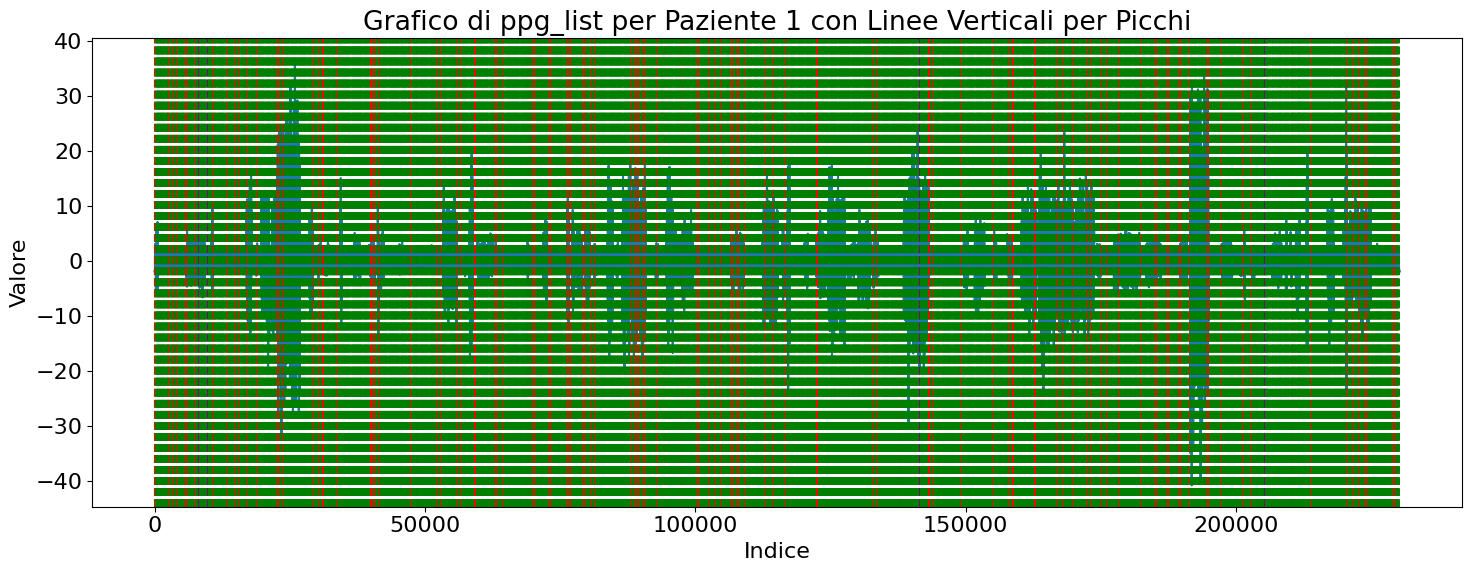

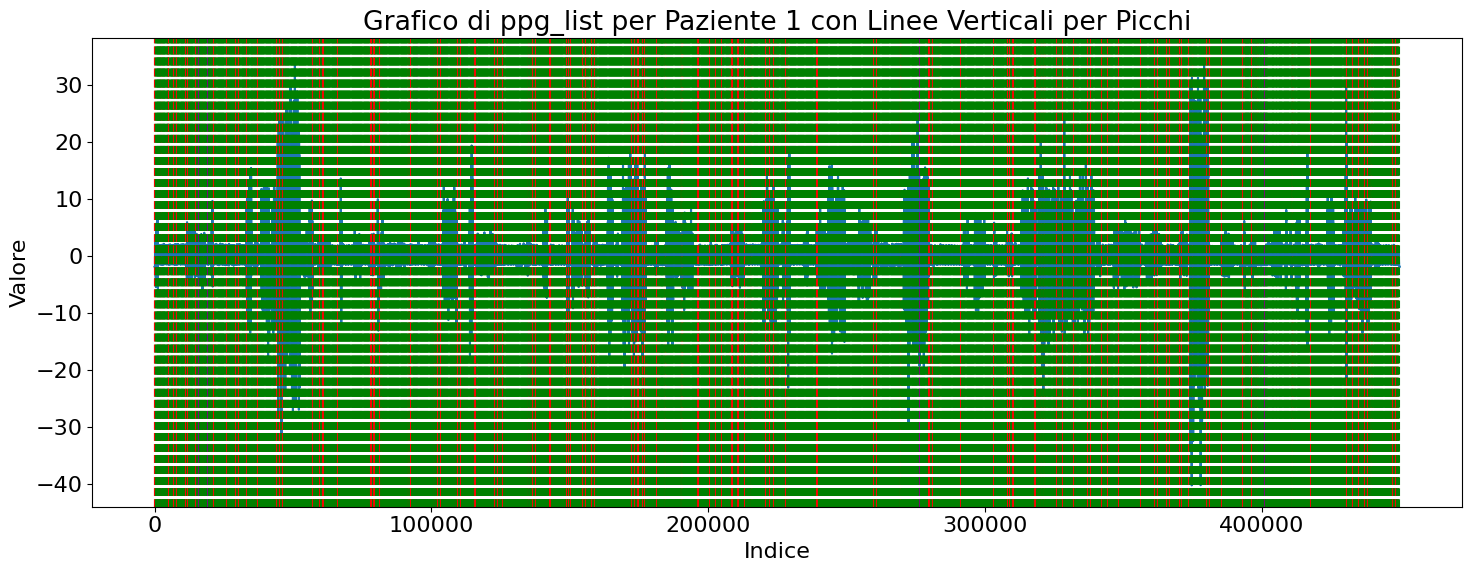

In [ ]:
start_example = 0
length = 230270
patient_index_example = 1
plot_patient_data(start_example,length, patient_index_example, ppg_list_128, ppg_list_128_speaks, ppg_list_128_ann)

start_example = 0
length = 449746
patient_index_example = 1
plot_patient_data(start_example, length, patient_index_example, interpolated_ppg_128_list, updated_speaks_128_list, ppg_list_128_ann)

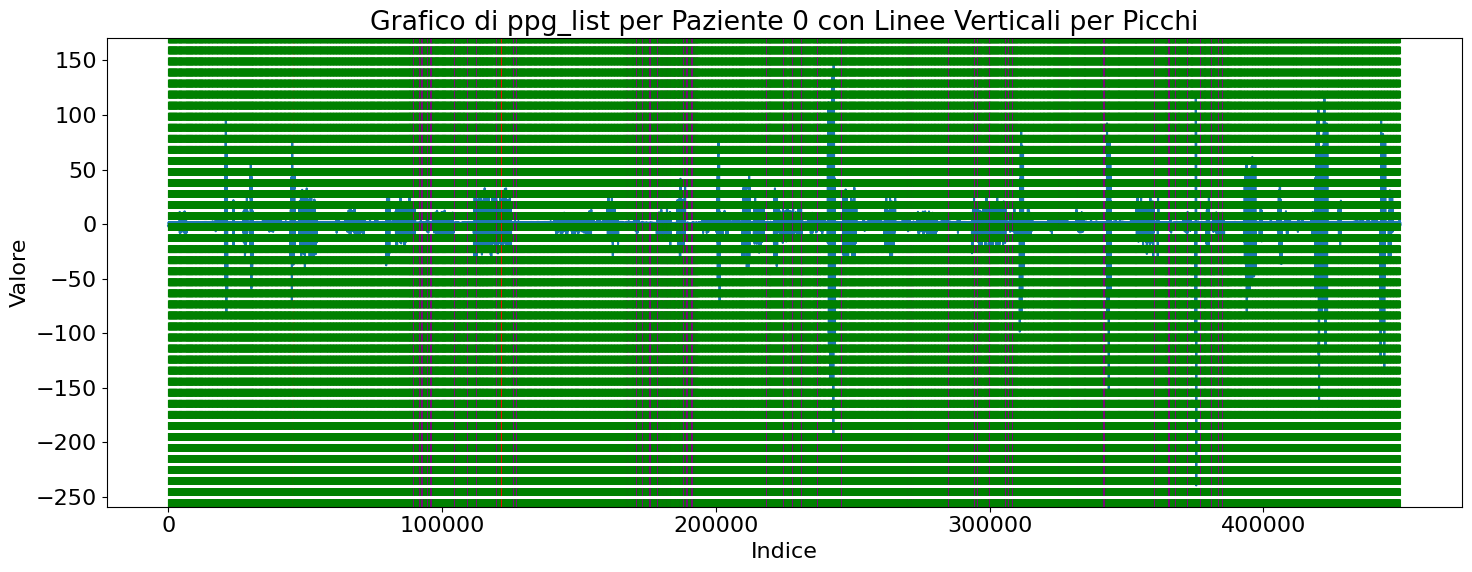

In [ ]:
start_example = 0
patient_index_example = 0
length = len(ppg_list_250[patient_index_example])

plot_patient_data(start_example, length,patient_index_example, ppg_list_250, ppg_list_250_speaks, ppg_list_250_ann)

UNISCO TUTTI I PAZIENTI (ORA TUTTI A 250Hz)

In [ ]:
ppg_list_ann = ppg_list_128_ann + ppg_list_250_ann
ppg_list = interpolated_ppg_128_list + ppg_list_250
ppg_list_speaks = updated_speaks_128_list + ppg_list_250_speaks

print(len(ppg_list_ann))
print(len(ppg_list))
print(len(ppg_list_speaks))

103
103
103


## Basic Data Visualization

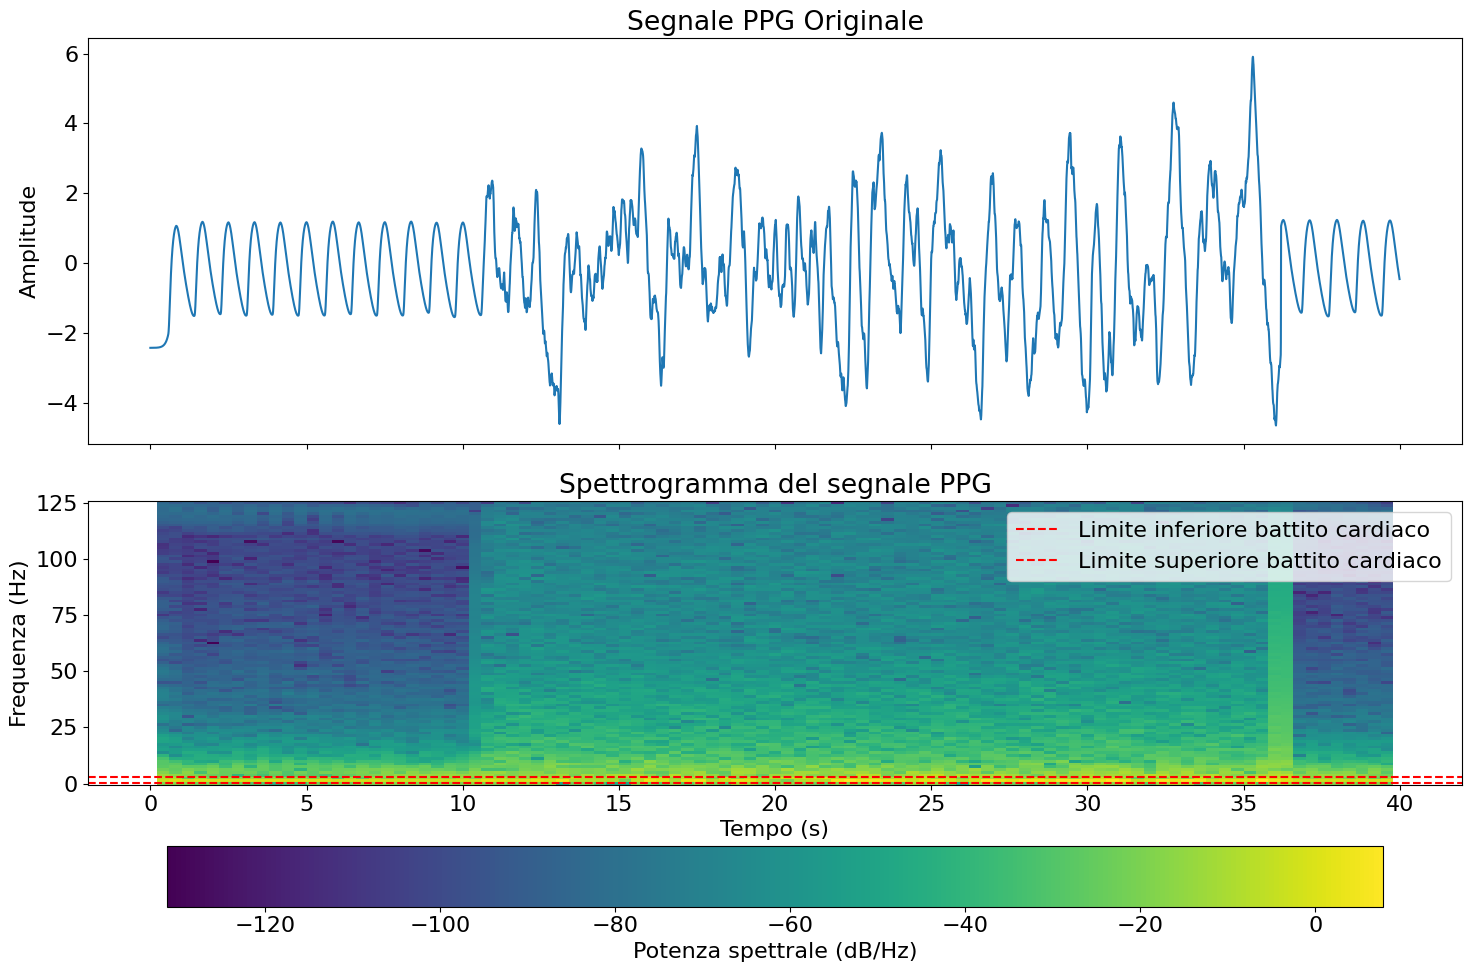

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Sostituisci questa lista con i dati del tuo paziente
ppg_data = np.array(ppg_list[0][:10000], dtype=np.float64)

# Parametri per la STFT
fs = 250  # Frequenza di campionamento (Hz)
nperseg = 200  # Numero di campioni per ogni segmento (lunghezza del battito)
noverlap = 100  # Sovrapposizione tra segmenti

# Calcola la STFT
frequencies, times, spectrogram_data = spectrogram(ppg_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Converti gli indici in secondi
time_seconds = np.arange(len(ppg_data)) / fs

# Imposta la dimensione della figura
fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot del segnale PPG originale con l'asse x in secondi
axs[0].plot(time_seconds, ppg_data)
axs[0].set_title('Segnale PPG Originale')
axs[0].set_ylabel('Amplitude')

# Plot dello spettrogramma
img = axs[1].pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='auto')
axs[1].set_title('Spettrogramma del segnale PPG')
axs[1].set_xlabel('Tempo (s)')
axs[1].set_ylabel('Frequenza (Hz)')

# Aggiungi la legenda dei colori
cbar = plt.colorbar(img, ax=axs[1], orientation='horizontal' ,label='Potenza spettrale (dB/Hz)')

# Regola la disposizione dei subplots per evitare sovrapposizioni
plt.tight_layout()

# Individua il battito cardiaco (ipotetico intervallo tra 0.5 e 3 Hz)
plt.axhline(y=0.5, color='r', linestyle='--', label='Limite inferiore battito cardiaco')
plt.axhline(y=3, color='r', linestyle='--', label='Limite superiore battito cardiaco')
plt.legend()

plt.show()


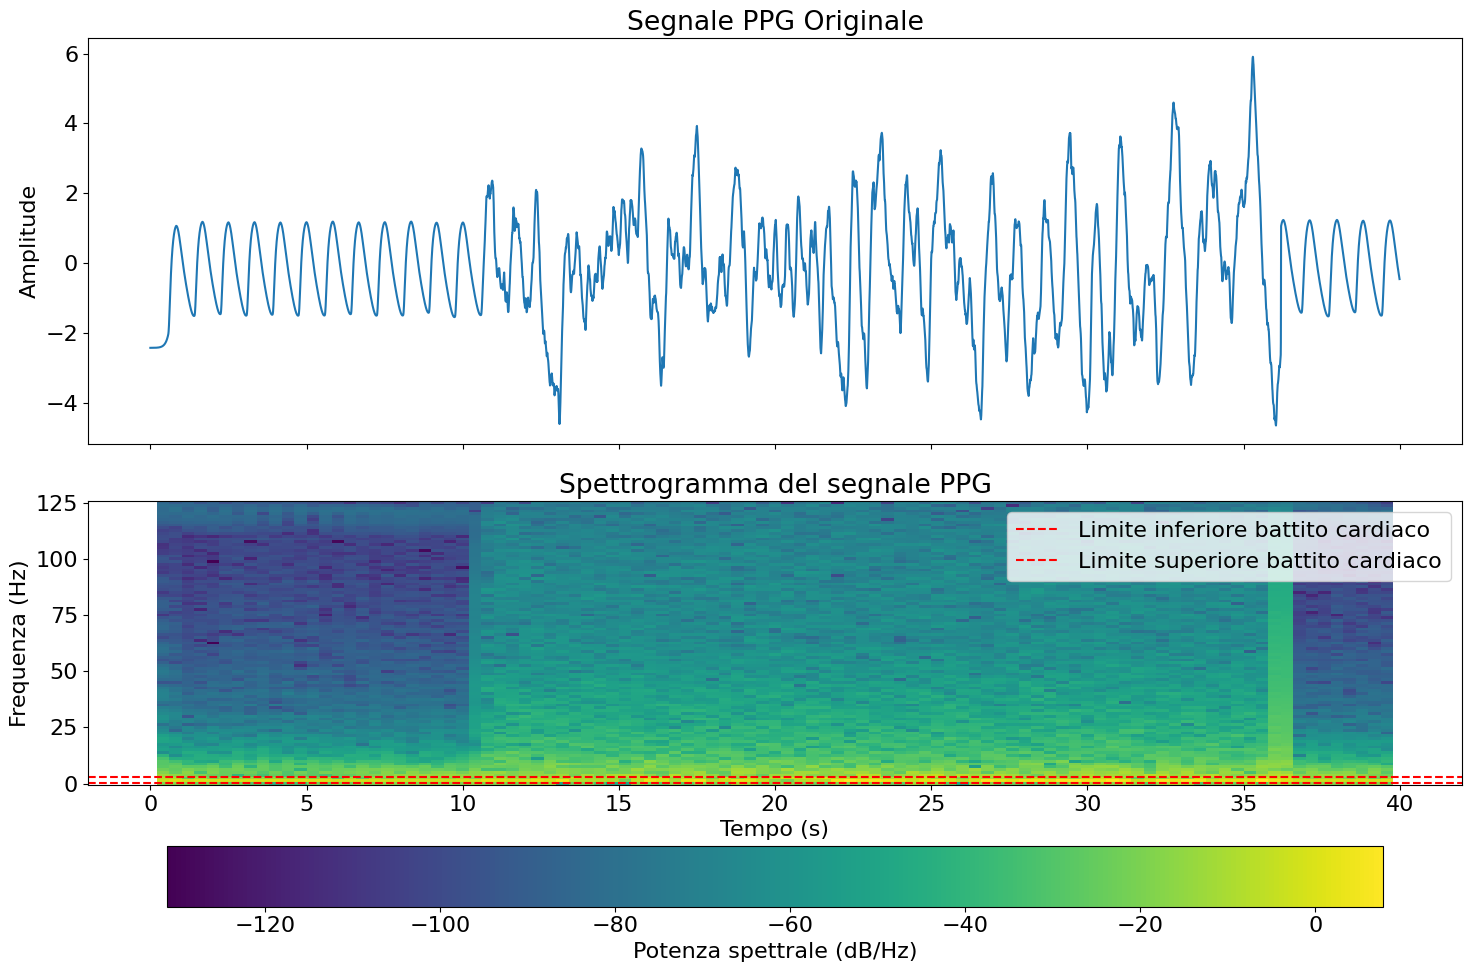

(array([  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,
         10.  ,  11.25,  12.5 ,  13.75,  15.  ,  16.25,  17.5 ,  18.75,
         20.  ,  21.25,  22.5 ,  23.75,  25.  ,  26.25,  27.5 ,  28.75,
         30.  ,  31.25,  32.5 ,  33.75,  35.  ,  36.25,  37.5 ,  38.75,
         40.  ,  41.25,  42.5 ,  43.75,  45.  ,  46.25,  47.5 ,  48.75,
         50.  ,  51.25,  52.5 ,  53.75,  55.  ,  56.25,  57.5 ,  58.75,
         60.  ,  61.25,  62.5 ,  63.75,  65.  ,  66.25,  67.5 ,  68.75,
         70.  ,  71.25,  72.5 ,  73.75,  75.  ,  76.25,  77.5 ,  78.75,
         80.  ,  81.25,  82.5 ,  83.75,  85.  ,  86.25,  87.5 ,  88.75,
         90.  ,  91.25,  92.5 ,  93.75,  95.  ,  96.25,  97.5 ,  98.75,
        100.  , 101.25, 102.5 , 103.75, 105.  , 106.25, 107.5 , 108.75,
        110.  , 111.25, 112.5 , 113.75, 115.  , 116.25, 117.5 , 118.75,
        120.  , 121.25, 122.5 , 123.75, 125.  ]),
 array([[1.21593538e-02, 1.98199026e-02, 2.04911029e-02, ...,
         9.85396181e-03,

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

def visualizza_spettrogramma(ppg_data, fs=250, nperseg=200, noverlap=100):
    # Calcola la STFT
    frequencies, times, spectrogram_data = spectrogram(ppg_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

    # Converti gli indici in secondi
    time_seconds = np.arange(len(ppg_data)) / fs

    # Imposta la dimensione della figura
    fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

    # Plot del segnale PPG originale con l'asse x in secondi
    axs[0].plot(time_seconds, ppg_data)
    axs[0].set_title('Segnale PPG Originale')
    axs[0].set_ylabel('Amplitude')

    # Plot dello spettrogramma
    img = axs[1].pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='auto')
    axs[1].set_title('Spettrogramma del segnale PPG')
    axs[1].set_xlabel('Tempo (s)')
    axs[1].set_ylabel('Frequenza (Hz)')

    # Aggiungi la legenda dei colori
    cbar = plt.colorbar(img, ax=axs[1], orientation='horizontal', label='Potenza spettrale (dB/Hz)')

    # Regola la disposizione dei subplots per evitare sovrapposizioni
    plt.tight_layout()

    # Individua il battito cardiaco (ipotetico intervallo tra 0.5 e 3 Hz)
    axs[1].axhline(y=0.5, color='r', linestyle='--', label='Limite inferiore battito cardiaco')
    axs[1].axhline(y=3, color='r', linestyle='--', label='Limite superiore battito cardiaco')
    axs[1].legend()

    plt.show()

    return frequencies,spectrogram_data

# Esempio di utilizzo
ppg_data = ppg_list[0][:10000]
visualizza_spettrogramma(ppg_data)


In [ ]:
from scipy.signal import butter, lfilter, filtfilt

def bandpass_filter(data, lowcut, highcut, signal_freq, filter_order):
        """
        Method responsible for creating and applying Butterworth filter.
        :param deque data: raw data
        :param float lowcut: filter lowcut frequency value
        :param float highcut: filter highcut frequency value
        :param int signal_freq: signal frequency in samples per second (Hz)
        :param int filter_order: filter order
        :return array: filtered data
        """
        nyquist_freq = 0.5 * signal_freq
        low = lowcut / nyquist_freq
        high = highcut / nyquist_freq
        b, a = butter(filter_order, [low, high], btype="band")
        y = lfilter(b, a, data)
        return y

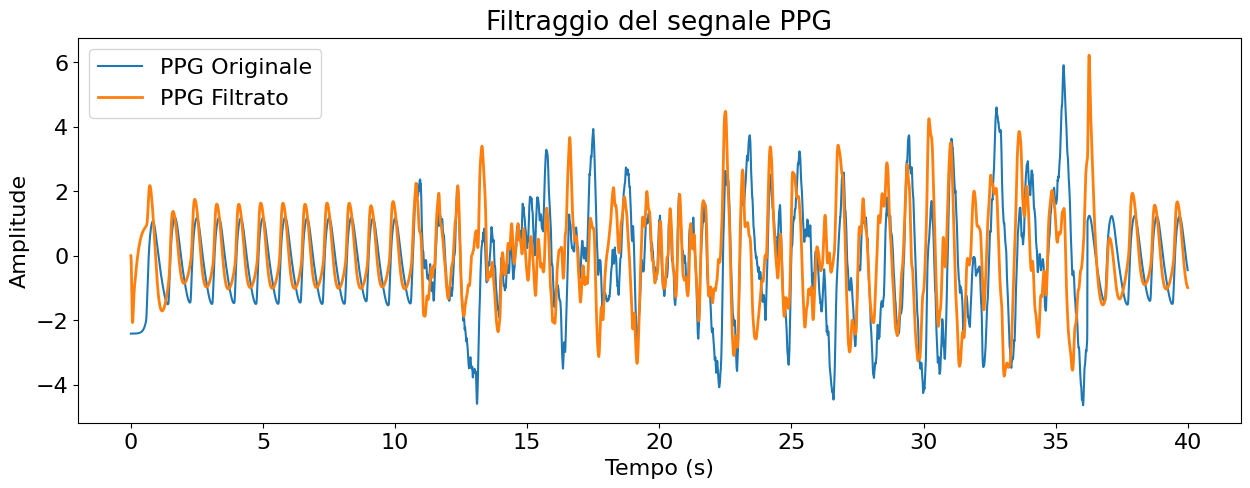

In [ ]:
# **********NON MIGLIORA LE PERFORMANCE *******************
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import butter, filtfilt

# # Sostituisci questa lista con i dati del tuo paziente
# ppg_data = ppg_list[0][:10000]



# # Filtra il segnale PPG
# ppg_filtered = bandpass_filter(ppg_data, 0.5, 10, 250, 3)


# # Converti gli indici in secondi
# time_seconds = np.arange(len(ppg_data)) / fs

# # Imposta la dimensione della figura
# plt.figure(figsize=(15, 5))

# # Plot del segnale PPG originale con l'asse x in secondi
# plt.plot(time_seconds, ppg_data, label='PPG Originale')
# plt.plot(time_seconds, ppg_filtered, label='PPG Filtrato', linewidth=2)
# plt.title('Filtraggio del segnale PPG')
# plt.xlabel('Tempo (s)')
# plt.ylabel('Amplitude')
# plt.legend()

# plt.show()


In [ ]:
def plot_patient_data(start,length, patient_index, ppg_list, ppg_list_speaks, ppg_list_ann):
    end = start + length

    # Creare un array di indici per la serie ppg_list
    indici = np.arange(start, end)

    # Creazione del grafico
    plt.figure(figsize=(15, 6))  # Imposta la larghezza della figura

    plt.plot(indici, ppg_list[patient_index][start:end], label='ppg_list')

    # Aggiungi linee verticali in corrispondenza dei valori in ppg_list_speaks
    for peak, category in zip(ppg_list_speaks[patient_index], ppg_list_ann[patient_index]):
        if start < peak < end:
            linestyle = '--'
            label = 'Picco'

            # Imposta il colore in base alla categoria del picco
            if category == 'N':
                color = 'green'
            elif category == 'S':
                color = 'red'
            elif category == 'V':
                color = 'purple'
            else:
                color = 'blue'  # Imposta un colore di default se la categoria non è N, S o V

            plt.axvline(x=peak, color=color, linestyle=linestyle, label=label)

    # Aggiungi titoli e etichette se necessario
    plt.title(f'Grafico di ppg_list per Paziente {patient_index} con Linee Verticali per Picchi')
    plt.xlabel('Indice')
    plt.ylabel('Valore')

    # Aggiungi la legenda
    #plt.legend(prop={'size': 6})

    # Rendi il grafico interattivo
    plt.tight_layout()
    plt.show()

In [ ]:
# Esempio di chiamata alla funzione
start_example = 130
patient_index_example = 2
plot_patient_data(start_example, 500, patient_index_example, ppg_list, ppg_list_speaks, ppg_list_ann)

Counter({'N': 226448, 'S': 9691, 'V': 7994})


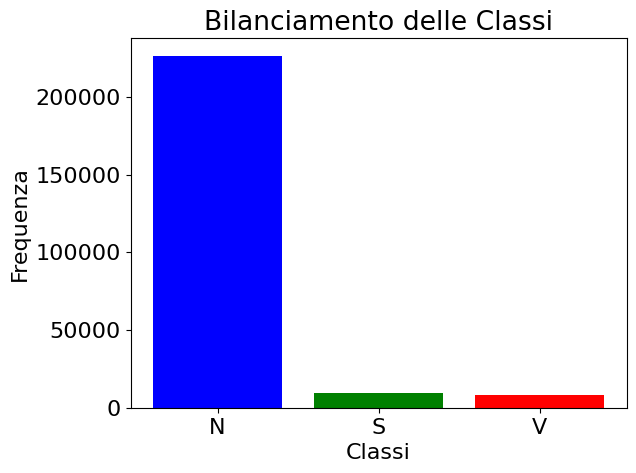

{'N': 92.7559977553219, 'S': 3.9695575772222518, 'V': 3.2744446674558536}


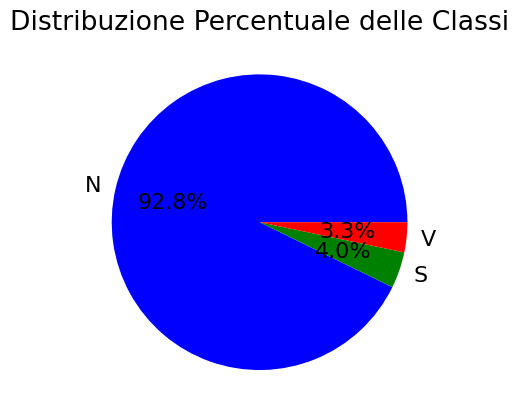

In [ ]:
#DATA VISUALIZATION PER TUTTE LE LABEL DEI PAZIENTI MESSE INSIEME

from collections import Counter

#CONTEGGIO ETICHETTE:
# ppg_list_ann è la lista di array contenenti le etichette
flat_list = [label for arr in ppg_list_ann for label in arr]
counts = Counter(flat_list)
print(counts)

#GRAFICO A BARRE:
labels, values = zip(*counts.items())
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Bilanciamento delle Classi')
plt.show()

#PERCENTUALI DI OGNI CLASSE
total_samples = len(flat_list)
percentages = {label: count / total_samples * 100 for label, count in counts.items()}

print(percentages)

# Percentuali delle classi
labels, values = zip(*percentages.items())

# Creazione del grafico a torta
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['blue', 'green', 'red'])

# Aggiungi un titolo
plt.title('Distribuzione Percentuale delle Classi')

# Mostra il grafico
plt.show()

103


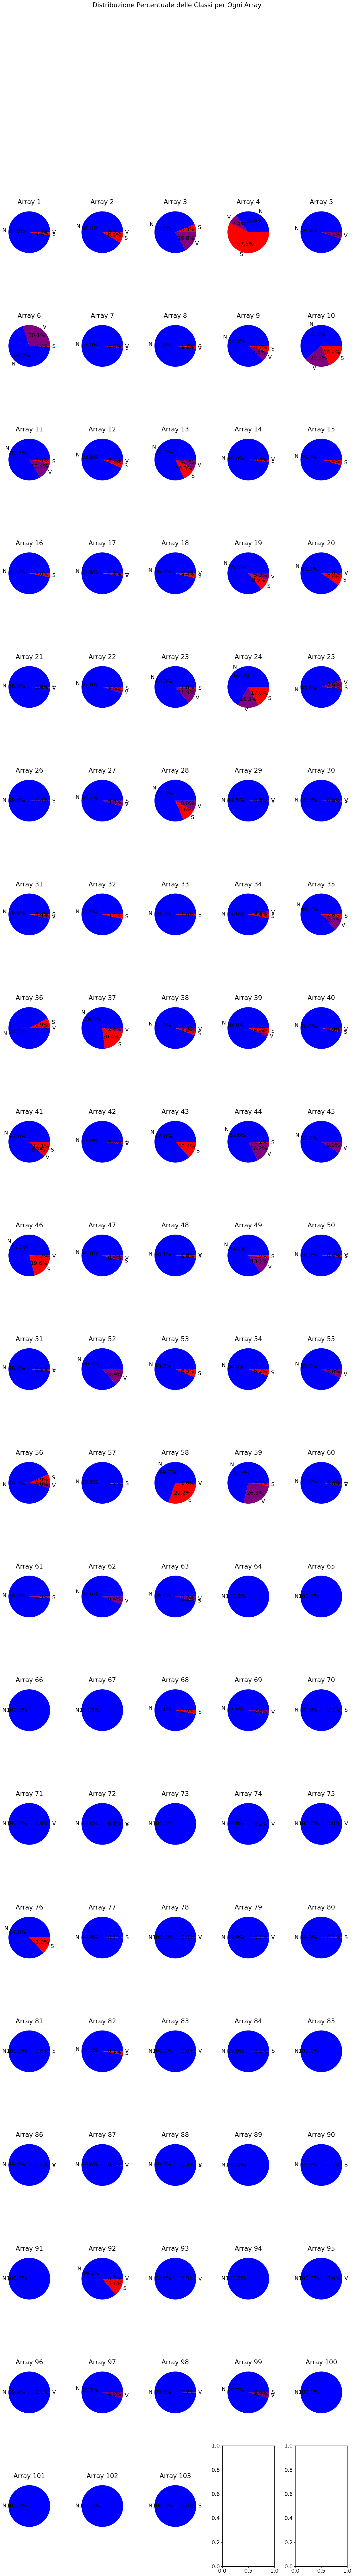

In [ ]:
#DATA VISUALIZATION PER OGNI SEGNALE (ognuno dei 105 pazienti)
# ppg_list_ann è la  lista di array contenenti le etichette
num_arrays = len(ppg_list_ann)
print(num_arrays)
# Calcola il numero di righe e colonne per la griglia di subplot (5 colonne per ogni riga)
num_rows = (num_arrays // 5) + (num_arrays % 5 > 0)
num_cols = min(num_arrays, 5)

# Creazione di subplot multipli
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.suptitle('Distribuzione Percentuale delle Classi per Ogni Array', y=1.02)

# Colori per le classi
colors = {'N': 'blue', 'S': 'red', 'V': 'purple'}

# Itera attraverso gli array e crea un grafico a torta per ciascuno
for i, arr in enumerate(ppg_list_ann):
    counts = Counter(arr)
    labels, values = zip(*counts.items())

    # Calcola la posizione del subplot nella griglia
    row_idx, col_idx = divmod(i, num_cols)

    # Calcola i rect per il layout
    rect = [col_idx / num_cols, 1 - (row_idx + 1) / num_rows, 1 / num_cols, 1 / num_rows]

    # Crea il grafico a torta nel subplot corrispondente
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    ax.pie(values, labels=labels, autopct='%1.1f%%', colors=[colors[label] for label in labels])
    ax.set_title(f'Array {i+1}')

# Regola la disposizione dei subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostra il grafico
plt.show()



In [ ]:
distances = np.diff(ppg_list_speaks[0].flatten())
print(len(ppg_list_speaks[0]))
print(distances[:30])

1932
[210.9375   207.03125  208.984375 207.03125  208.984375 210.9375
 207.03125  208.984375 210.9375   203.125    210.9375   208.984375
 208.984375 203.125    210.9375   208.984375 207.03125  210.9375
 207.03125  210.9375   212.890625 207.03125  210.9375   212.890625
 210.9375   212.890625 212.890625 214.84375  212.890625 214.84375 ]


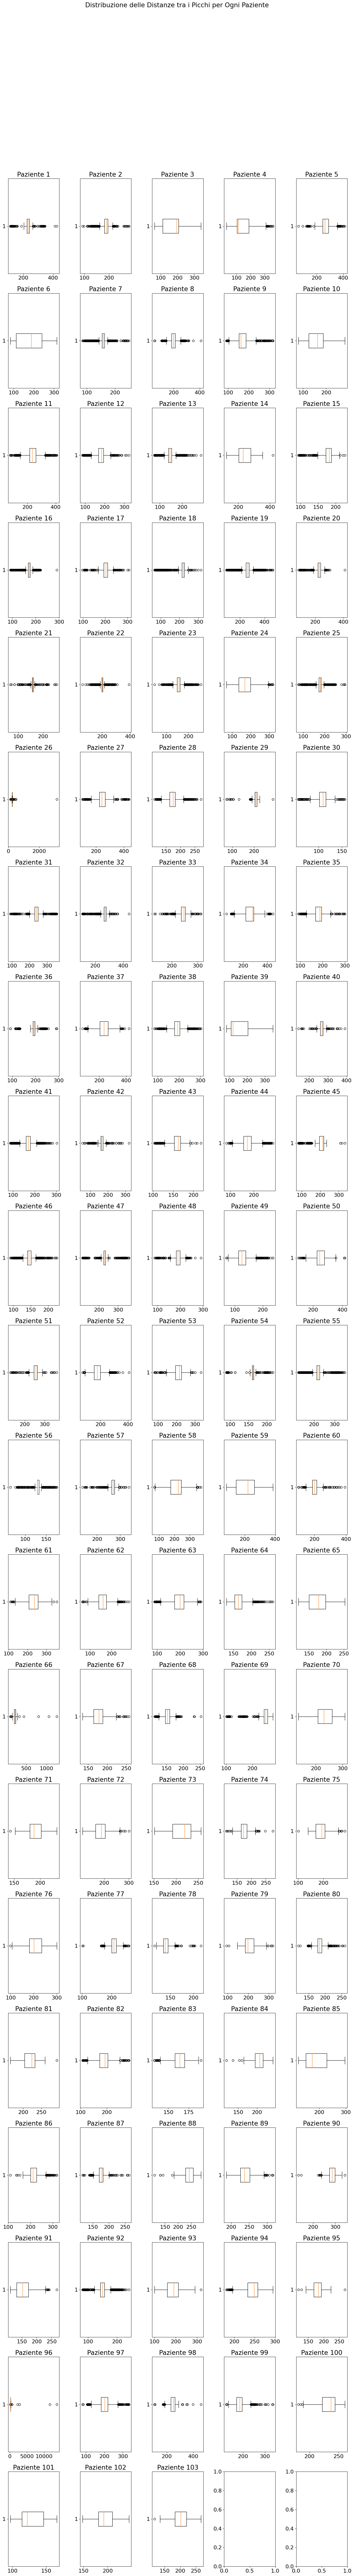

In [ ]:
# Creazione di subplot multipli per i boxplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.suptitle('Distribuzione delle Distanze tra i Picchi per Ogni Paziente', y=1.02)

# Itera attraverso gli array di picchi e crea un boxplot per ciascuno
for i, peaks_array in enumerate(ppg_list_speaks):
    # Calcola le distanze tra i picchi
    distances = np.diff(peaks_array.flatten())
    # Calcola la posizione del subplot nella griglia
    row_idx, col_idx = divmod(i, num_cols)

    # Calcola i rect per il layout
    rect = [col_idx / num_cols, 1 - (row_idx + 1) / num_rows, 1 / num_cols, 1 / num_rows]

    # Crea il boxplot nel subplot corrispondente
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    ax.boxplot(distances, vert=False)
    ax.set_title(f'Paziente {i+1}')

# Regola la disposizione dei subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostra il grafico
plt.show()

## CREATE DATASET

###SPLIT PATIENTS (train/val/test)

SPLIT IN TRAIN/VAL/TEST CERCANDO DI DIVIDERE I PAZIENTI, IN MODO DA PRESERVARE PIU O MENO LA DISTRIBUZIONE:



1.   Calcola la distribuzione delle label per ogni paziente.
2.   Ordina i pazienti in base alla loro distribuzione di label.
3.   Dividi i pazienti in train, val e test in base al rapporto desiderato





In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split

# Supponiamo che ppg_list_ann sia una lista di liste di label, una lista per paziente
# Inserisci il tuo codice per ottenere ppg_list_ann

# Calcola la distribuzione delle label per ogni paziente
label_distributions = [Counter(arr) for arr in ppg_list_ann]

# Ottieni l'elenco di pazienti e le rispettive distribuzioni di label
patients, distributions = zip(*enumerate(label_distributions))

# Ordina i pazienti in base alle loro distribuzioni di label
sorted_patients = [x for _, x in sorted(zip(distributions, patients), key=lambda pair: sum(pair[0].values()), reverse=True)]

# Definisci i rapporti di divisione per train, val, test (ad esempio, 70%, 15%, 15%)
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Calcola le dimensioni dei set di allenamento, validazione e test
num_patients = len(sorted_patients)
num_train = int(train_ratio * num_patients)
num_val = int(val_ratio * num_patients)

# Dividi i pazienti
train_patients, remaining_patients = sorted_patients[:num_train], sorted_patients[num_train:]
val_patients, test_patients = remaining_patients[:num_val], remaining_patients[num_val:]

# Verifica la distribuzione delle label nei set di allenamento, validazione e test
train_label_distribution = Counter(label for patient in train_patients for label in ppg_list_ann[patient])
val_label_distribution = Counter(label for patient in val_patients for label in ppg_list_ann[patient])
test_label_distribution = Counter(label for patient in test_patients for label in ppg_list_ann[patient])

print("Distribuzione delle label nel set di allenamento:", train_label_distribution)
print("Distribuzione delle label nel set di validazione:", val_label_distribution)
print("Distribuzione delle label nel set di test:", test_label_distribution)


Distribuzione delle label nel set di allenamento: Counter({'N': 171564, 'S': 8504, 'V': 6451})
Distribuzione delle label nel set di validazione: Counter({'N': 27389, 'V': 1140, 'S': 817})
Distribuzione delle label nel set di test: Counter({'N': 27495, 'V': 403, 'S': 370})


In [ ]:
print(train_patients)
print(val_patients)
print(test_patients)

[29, 48, 100, 55, 77, 3, 45, 12, 91, 38, 67, 90, 6, 22, 42, 20, 9, 61, 53, 82, 63, 41, 8, 23, 2, 40, 15, 43, 27, 73, 24, 64, 86, 11, 66, 14, 51, 34, 94, 79, 98, 1, 5, 71, 92, 84, 74, 47, 81, 70, 35, 37, 62, 101, 44, 102, 59, 21, 16, 96, 78, 83, 7, 28, 76, 75, 17, 57, 52, 72, 85, 80]
[54, 58, 19, 65, 69, 46, 36, 60, 99, 0, 10, 30, 13, 88, 95]
[87, 32, 97, 93, 26, 25, 68, 49, 50, 33, 18, 31, 39, 56, 4, 89]


In [ ]:
# Dividi ppg_list
train_ppg_list = [ppg_list[i] for i in train_patients]
val_ppg_list = [ppg_list[i] for i in val_patients]
test_ppg_list = [ppg_list[i] for i in test_patients]

# Dividi ppg_list_speaks
train_ppg_list_speaks = [ppg_list_speaks[i] for i in train_patients]
val_ppg_list_speaks = [ppg_list_speaks[i] for i in val_patients]
test_ppg_list_speaks = [ppg_list_speaks[i] for i in test_patients]

# Dividi ppg_list_ann
train_ppg_list_ann = [ppg_list_ann[i] for i in train_patients]
val_ppg_list_ann = [ppg_list_ann[i] for i in val_patients]
test_ppg_list_ann = [ppg_list_ann[i] for i in test_patients]

# Verifica le dimensioni dei set di segnali e notazioni dei picchi
print("Dimensione del set di allenamento (patients):", len(train_patients))
print("Dimensione del set di validazione (patients):", len(val_patients))
print("Dimensione del set di test (patients):", len(test_patients))

print("Dimensione del set di allenamento (label):", len(train_ppg_list_ann))
print("Dimensione del set di validazione (label):", len(val_ppg_list_ann))
print("Dimensione del set di test (label):", len(test_ppg_list_ann))

print("Dimensione del set di allenamento (ppg_list):", len(train_ppg_list))
print("Dimensione del set di validazione (ppg_list):", len(val_ppg_list))
print("Dimensione del set di test (ppg_list):", len(test_ppg_list))

print("Dimensione del set di allenamento (ppg_list_speaks):", len(train_ppg_list_speaks))
print("Dimensione del set di validazione (ppg_list_speaks):", len(val_ppg_list_speaks))
print("Dimensione del set di test (ppg_list_speaks):", len(test_ppg_list_speaks))


Dimensione del set di allenamento (patients): 72
Dimensione del set di validazione (patients): 15
Dimensione del set di test (patients): 16
Dimensione del set di allenamento (label): 72
Dimensione del set di validazione (label): 15
Dimensione del set di test (label): 16
Dimensione del set di allenamento (ppg_list): 72
Dimensione del set di validazione (ppg_list): 15
Dimensione del set di test (ppg_list): 16
Dimensione del set di allenamento (ppg_list_speaks): 72
Dimensione del set di validazione (ppg_list_speaks): 15
Dimensione del set di test (ppg_list_speaks): 16


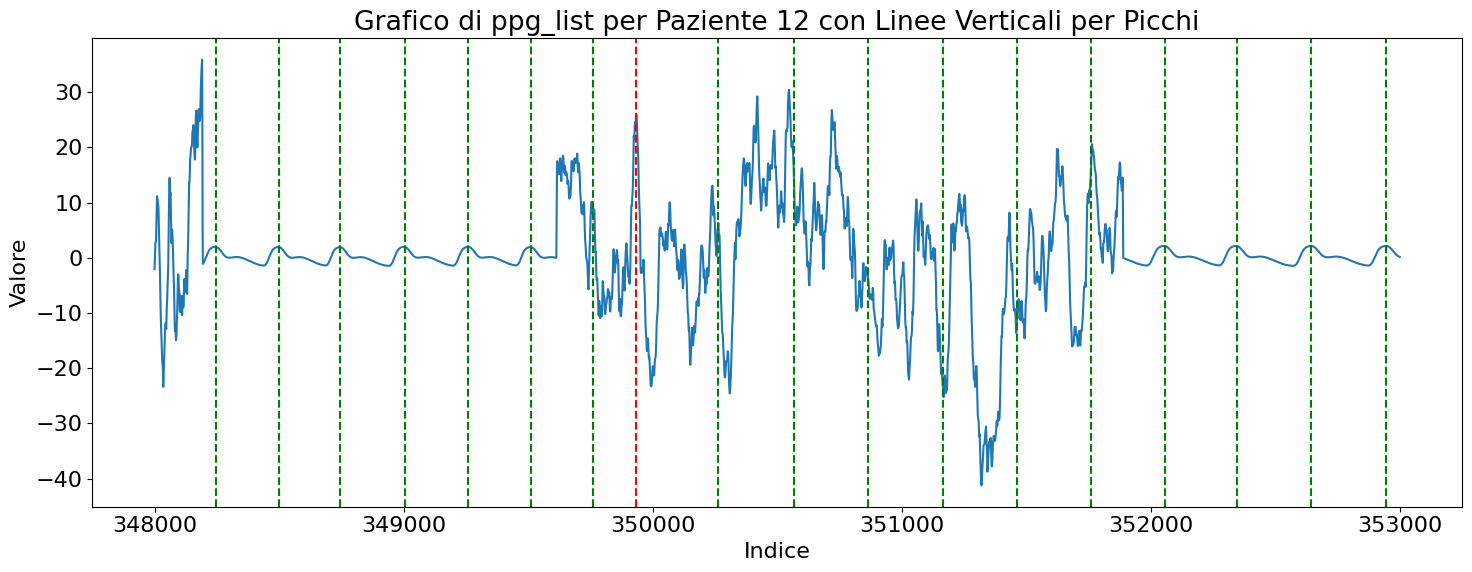

In [ ]:
start_example = 348000
patient_index_example = 12
length = 5000 #len(train_ppg_list[patient_index_example])

plot_patient_data(start_example, length,patient_index_example, val_ppg_list, val_ppg_list_speaks, val_ppg_list_ann)

### ESTRAI BEAT (scarta rumore)

In [ ]:
# #***********************ESTRAI BEAT LUNGHI 200, CIRCA COL PICCO A 1/3 DELLA LUNGHEZZA***************

# def extract_beats(ppg_list, ppg_list_speaks, ppg_list_ann):
#     all_beats = []
#     all_labels = []

#     for signals, peaks, labels in zip(ppg_list, ppg_list_speaks, ppg_list_ann):
#         beats = []
#         beat_labels = []

#         for peak_pos, label in zip(peaks, labels):
#             # Calcola la lunghezza media tra i picchi
#             average_distance = 200  # MEDIA VISTA A SPANNE DA BOXPLOT. PROVARE A VEDERE ALTRI METODI, O VEDERE SE LUNGHEZZA BATTITO INFLUISCE. (MAGARI FARE PADDING.COSI LA RETE VEDE QUALI BATTITI DURANO DI PIU)
#             peak_ratio = 1/3  # Rapporto per il posizionamento del picco

#             # Calcola la lunghezza del battito
#             beat_length = int(average_distance)

#             # Calcola la posizione del picco nel battito
#             peak_position_in_beat = int(beat_length * peak_ratio)

#             # Calcola la finestra temporale per estrarre il battito
#             window_start = int(peak_pos - peak_position_in_beat)
#             window_end = int(window_start + beat_length)

#             # Estrai il battito dalla finestra temporale
#             beat = signals[window_start:window_end]

#             if(beat_length == len(beat)):
#               # Aggiungi il battito e la label corrispondente all'array
#               beats.append(beat.flatten())
#               beat_labels.append(label)

#         all_beats.extend(beats)
#         all_labels.extend(beat_labels)

#     return all_beats, all_labels

# # Estrai i battiti per i set di allenamento, validazione e test
# train_beats, train_beats_labels = extract_beats(train_ppg_list, train_ppg_list_speaks, train_ppg_list_ann)
# val_beats, val_beats_labels = extract_beats(val_ppg_list, val_ppg_list_speaks, val_ppg_list_ann)
# test_beats, test_beats_labels = extract_beats(test_ppg_list, test_ppg_list_speaks, test_ppg_list_ann)

# # Converti gli array di battiti in un array numpy E ELIMINA L ULTIMO ELEMENTO perche spesso piu corto
# train_beats_array = np.array(train_beats[:-1])
# val_beats_array = np.array(val_beats[:-1])
# test_beats_array = np.array(test_beats[:-1])

# # ELIMINA ULTIMO ELEMENTO LABEL
# train_beats_labels.pop()
# val_beats_labels.pop()
# test_beats_labels.pop()

# # Verifica le dimensioni degli array di battiti e labels
# print("Dimensione del set di allenamento (beats):", train_beats_array.shape)
# print("Dimensione del set di validazione (beats):", val_beats_array.shape)
# print("Dimensione del set di test (beats):", test_beats_array.shape)

# print("Dimensione del set di allenamento (labels):", len(train_beats_labels))
# print("Dimensione del set di validazione (labels):", len(val_beats_labels))
# print("Dimensione del set di test (labels):", len(test_beats_labels))


In [ ]:
def is_noise_check(segnale, fs=250, nperseg=400, noverlap=0, soglia_alte_frequenze=5, soglia_rumore=0.1):
    frequencies, _,spectr_data = spectrogram(segnale, fs=fs, nperseg=nperseg, noverlap=noverlap)

    # Calcola la somma della potenza nelle alte frequenze
    potenza_alte_frequenze_battito = np.sum(spectr_data[frequencies > soglia_alte_frequenze, :])

    # Classifica il battito in base alla soglia
    rumore = potenza_alte_frequenze_battito > soglia_rumore

    # if rumore:
    #   print('This signal is noisy.')
    return rumore

In [ ]:
#***********ESTRAI BEAT DAL PICCO PREECDENTE AL SUCCESSIVO PER UNA LUNGHEZZA MAX DI 400 (SE PIU CORTO PADDA)

def extract_beats(ppg_list, ppg_list_speaks, ppg_list_ann, max_beat_length=400):
    all_beats = []
    all_labels = []
    check=0
    for signals, peaks, labels in zip(ppg_list, ppg_list_speaks, ppg_list_ann):
        beats = []
        beat_labels = []

        for i in range(1, len(peaks) - 1):
            peak_pos = peaks[i]
            prev_peak_pos = peaks[i - 1]
            next_peak_pos = peaks[i + 1]
            label = labels[i]

            # Calcola la lunghezza del battito come la distanza tra il picco precedente e quello successivo
            beat_length = int(next_peak_pos - prev_peak_pos)

            # Calcola la finestra temporale per estrarre il battito
            window_start = int(prev_peak_pos)
            window_end = int(next_peak_pos)

            # Estrai il battito dalla finestra temporale
            beat = signals[window_start:window_end]

            # Verifica se la lunghezza supera il massimo consentito e taglia ai lati
            if len(beat) > max_beat_length:
                excess = len(beat) - max_beat_length
                cut_start = excess // 2
                cut_end = excess - cut_start
                beat = beat[cut_start:-cut_end]
            # Padda con zeri se la lunghezza è inferiore a 400
            if len(beat) < max_beat_length:
                padding_start = (max_beat_length - len(beat)) // 2
                padding_end = max_beat_length - len(beat) - padding_start
                beat = np.pad(beat, (padding_start, padding_end), mode='constant', constant_values=0)

            soglia_rumore = 0.1
            # if (label == 'N'): #PIUTTOSTO MEGLIO CHE CLASSIFICA BATTITI RUMOROSI COME MALATI. QUINDI AUMENTO LA SOGLIA PER N.PER AVERE N PULITI. COSI LA RETE IMPARA BENE
            #   soglia_rumore = 0.05

            # Applica la funzione is_noise_check e scarta il battito se ritorna True
            if (len(beat.flatten())==400 and not is_noise_check(beat.flatten(), fs=250, nperseg=400, noverlap=0, soglia_alte_frequenze=5, soglia_rumore=soglia_rumore)):
                beats.append(beat.flatten())
                beat_labels.append(label)

        all_beats.extend(beats)
        all_labels.extend(beat_labels)
    return all_beats, all_labels

# Estrai i battiti per i set di allenamento, validazione e test
train_beats, train_beats_labels = extract_beats(train_ppg_list, train_ppg_list_speaks, train_ppg_list_ann, 400)
val_beats, val_beats_labels = extract_beats(val_ppg_list, val_ppg_list_speaks, val_ppg_list_ann, 400)
test_beats, test_beats_labels = extract_beats(test_ppg_list, test_ppg_list_speaks, test_ppg_list_ann, 400)

# Converti gli array di battiti in un array numpy
train_beats_array = np.array(train_beats)
val_beats_array = np.array(val_beats[:])
test_beats_array = np.array(test_beats[:])

# Verifica le dimensioni degli array di battiti e labels
print("Dimensione del set di allenamento (beats):", train_beats_array.shape)
print("Dimensione del set di validazione (beats):", val_beats_array.shape)
print("Dimensione del set di test (beats):", test_beats_array.shape)

print("Dimensione del set di allenamento (labels):", len(train_beats_labels))
print("Dimensione del set di validazione (labels):", len(val_beats_labels))
print("Dimensione del set di test (labels):", len(test_beats_labels))

Dimensione del set di allenamento (beats): (68477, 400)
Dimensione del set di validazione (beats): (16567, 400)
Dimensione del set di test (beats): (16878, 400)
Dimensione del set di allenamento (labels): 68477
Dimensione del set di validazione (labels): 16567
Dimensione del set di test (labels): 16878


In [ ]:
#CHECK PER VEDERE CHE SIANO TUTTE LUNGHE UGUALI
# Dizionario per tenere traccia delle lunghezze e delle occorrenze
length_occurrences = {}

# Calcola le occorrenze delle lunghezze
for beat in train_beats_array:
    length = len(beat)
    if length in length_occurrences:
        length_occurrences[length] += 1
    else:
        length_occurrences[length] = 1

# Stampa le lunghezze e le relative occorrenze
for length, occurrences in length_occurrences.items():
    print(f"Lunghezza: {length}, Occorrenze: {occurrences}")

Lunghezza: 400, Occorrenze: 68477


### BILANCIAMENTO CLASSI (downsampling classe N)

####train

Counter({'N': 61329, 'S': 3982, 'V': 3166})


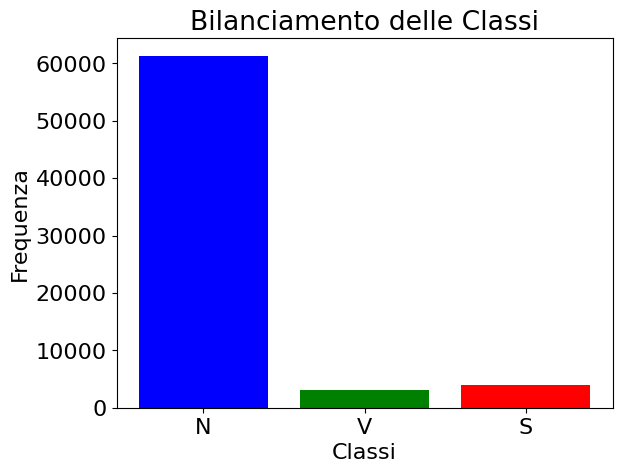

In [ ]:
#CONTEGGIO ETICHETTE TRAIN:
# train_beats_labels
flat_list = [label for arr in train_beats_labels for label in arr]
counts = Counter(flat_list)
print(counts)

#GRAFICO A BARRE:
labels, values = zip(*counts.items())
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Bilanciamento delle Classi')
plt.show()

In [ ]:
#DOWNSAMPLING TOGLIENDO BEAT PIU RUMOROSI
# DOWNSAMPLING TRAIN:
data_shape = train_beats_array.shape
label_to_downsample = 'N'

# Trova gli indici degli elementi con l'etichetta specificata
indices_to_downsample = [i for i, label in enumerate(train_beats_labels) if label == label_to_downsample]

# Trova gli indici degli elementi con etichette diverse da quella specificata
indices_other_labels = [i for i, label in enumerate(train_beats_labels) if label != label_to_downsample]

# Lista per tenere traccia degli indici da mantenere
indices_to_keep = []

# Itera sugli indici da downsamplare
for i in indices_to_downsample:
    beat_to_check = train_beats_array[i]
    soglia_rumore = 0.05
    # Applica la tua funzione is_noise_check
    if not is_noise_check(beat_to_check.flatten(), fs=250, nperseg=400, noverlap=0, soglia_alte_frequenze=5, soglia_rumore=soglia_rumore):
        indices_to_keep.append(i)

# Unisce gli indici da mantenere per l'etichetta specificata con quelli di altre etichette
indices_to_keep_all = indices_to_keep + indices_other_labels

# Seleziona gli elementi corrispondenti agli indici generati
train_beats_array = train_beats_array[indices_to_keep_all]
train_beats_labels = [train_beats_labels[i] for i in indices_to_keep_all]

print(train_beats_array.shape)
print(len(train_beats_labels))


(50869, 400)
50869


In [ ]:
#DOWNSAMPLING TRAIN:
data_shape = train_beats_array.shape
desired_fraction = 1/4 #usare 1/6 se soglia rumore uguale per tutti
label_to_downsample = 'N'

# Trova gli indici degli elementi con l'etichetta specificata
indices_to_downsample = [i for i, label in enumerate(train_beats_labels) if label == label_to_downsample]

# Trova gli indici degli elementi con etichette diverse da quella specificata
indices_other_labels = [i for i, label in enumerate(train_beats_labels) if label != label_to_downsample]

# Calcola il numero di elementi da mantenere solo per l'etichetta specificata
num_elements_to_keep = int(len(indices_to_downsample) * desired_fraction)

# Genera indici casuali da mantenere solo per l'etichetta specificata
indices_to_keep = np.random.choice(indices_to_downsample, size=num_elements_to_keep, replace=False)

# Unisce gli indici da mantenere per l'etichetta specificata con quelli di altre etichette
indices_to_keep_all = list(indices_to_keep) + indices_other_labels

# Seleziona gli elementi corrispondenti agli indici generati
train_beats_array = train_beats_array[indices_to_keep_all]
train_beats_labels = [train_beats_labels[i] for i in indices_to_keep_all]

print(train_beats_array.shape)
print(len(train_beats_labels))

(18078, 400)
18078


Counter({'N': 10930, 'S': 3982, 'V': 3166})


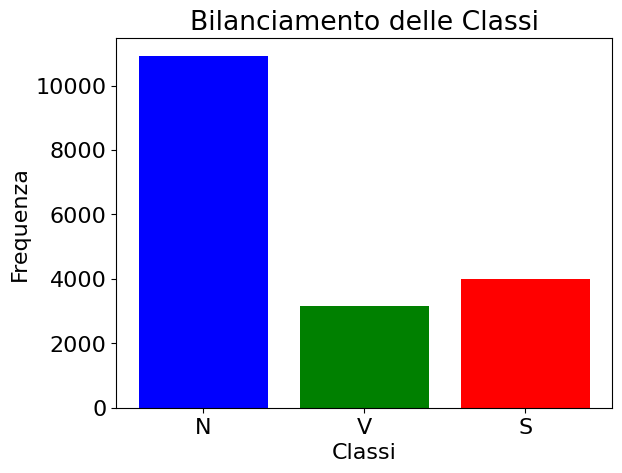

In [ ]:
#CONTEGGIO ETICHETTE TRAIN:
# train_beats_labels
flat_list = [label for arr in train_beats_labels for label in arr]
counts = Counter(flat_list)
print(counts)

#GRAFICO A BARRE:
labels, values = zip(*counts.items())
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Bilanciamento delle Classi')
plt.show()

####val

In [ ]:
#DOWNSAMPLING VAL:
data_shape = val_beats_array.shape
desired_fraction = 1/4
label_to_downsample = 'N'

# Trova gli indici degli elementi con l'etichetta specificata
indices_to_downsample = [i for i, label in enumerate(val_beats_labels) if label == label_to_downsample]

# Trova gli indici degli elementi con etichette diverse da quella specificata
indices_other_labels = [i for i, label in enumerate(val_beats_labels) if label != label_to_downsample]

# Calcola il numero di elementi da mantenere solo per l'etichetta specificata
num_elements_to_keep = int(len(indices_to_downsample) * desired_fraction)

# Genera indici casuali da mantenere solo per l'etichetta specificata
indices_to_keep = np.random.choice(indices_to_downsample, size=num_elements_to_keep, replace=False)

# Unisce gli indici da mantenere per l'etichetta specificata con quelli di altre etichette
indices_to_keep_all = list(indices_to_keep) + indices_other_labels

# Seleziona gli elementi corrispondenti agli indici generati
val_beats_array = val_beats_array[indices_to_keep_all]
val_beats_labels = [val_beats_labels[i] for i in indices_to_keep_all]

print(val_beats_array.shape)
print(len(val_beats_labels))

(4979, 400)
4979


Counter({'N': 3862, 'V': 632, 'S': 485})


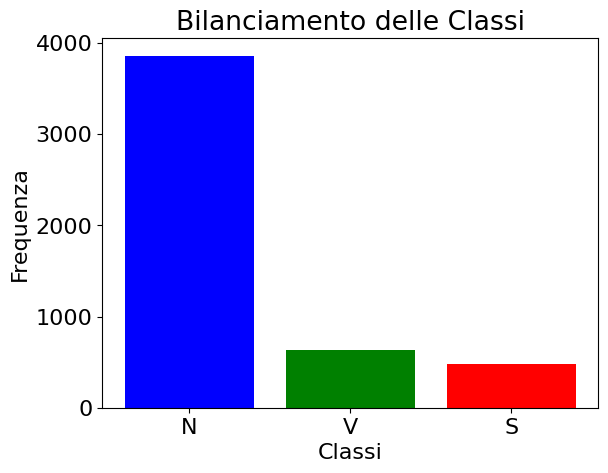

In [ ]:
#CONTEGGIO ETICHETTE TRAIN:
# train_beats_labels
flat_list = [label for arr in val_beats_labels for label in arr]
counts = Counter(flat_list)
print(counts)

#GRAFICO A BARRE:
labels, values = zip(*counts.items())
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Bilanciamento delle Classi')
plt.show()

####test

In [ ]:
#DOWNSAMPLING TRAIN:
data_shape = test_beats_array.shape
desired_fraction = 1/4
label_to_downsample = 'N'

# Trova gli indici degli elementi con l'etichetta specificata
indices_to_downsample = [i for i, label in enumerate(test_beats_labels) if label == label_to_downsample]

# Trova gli indici degli elementi con etichette diverse da quella specificata
indices_other_labels = [i for i, label in enumerate(test_beats_labels) if label != label_to_downsample]

# Calcola il numero di elementi da mantenere solo per l'etichetta specificata
num_elements_to_keep = int(len(indices_to_downsample) * desired_fraction)

# Genera indici casuali da mantenere solo per l'etichetta specificata
indices_to_keep = np.random.choice(indices_to_downsample, size=num_elements_to_keep, replace=False)

# Unisce gli indici da mantenere per l'etichetta specificata con quelli di altre etichette
indices_to_keep_all = list(indices_to_keep) + indices_other_labels

# Seleziona gli elementi corrispondenti agli indici generati
test_beats_array = test_beats_array[indices_to_keep_all]
test_beats_labels = [test_beats_labels[i] for i in indices_to_keep_all]

print(test_beats_array.shape)
print(len(test_beats_labels))

(4568, 400)
4568


Counter({'N': 4103, 'S': 240, 'V': 225})


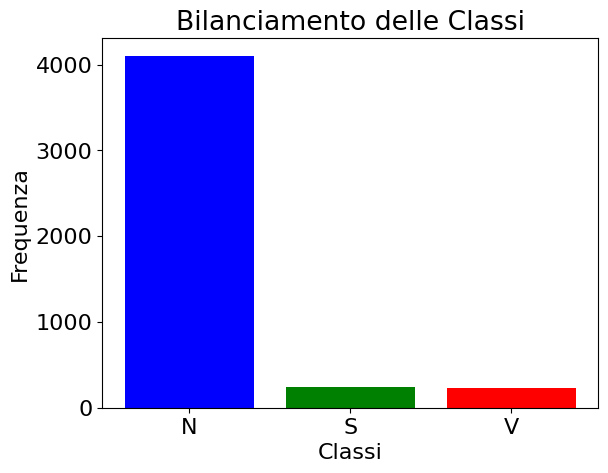

In [ ]:

#CONTEGGIO ETICHETTE TRAIN:
# train_beats_labels
flat_list = [label for arr in test_beats_labels for label in arr]
counts = Counter(flat_list)
print(counts)

#GRAFICO A BARRE:
labels, values = zip(*counts.items())
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Bilanciamento delle Classi')
plt.show()

###PORTO LABELS IN ONE-HOT-ENCODING

In [ ]:
from tensorflow.keras.utils import to_categorical

# Mappa delle etichette a valori numerici
label_mapping = {'N': 0, 'S': 1, 'V': 1}
num_classes=2

# Converte le label in formato numerico
train_numeric_labels = [label_mapping[label] for label in train_beats_labels]
val_numeric_labels = [label_mapping[label] for label in val_beats_labels]
test_numeric_labels = [label_mapping[label] for label in test_beats_labels]

# Converte le label in formato one-hot encoding
train_beats_labels_onehot = to_categorical(train_numeric_labels, num_classes)
val_beats_labels_onehot = to_categorical(val_numeric_labels, num_classes)
test_beats_labels_onehot = to_categorical(test_numeric_labels, num_classes)

# Verifica le dimensioni degli array one-hot encoding delle label
print("Dimensione del set di allenamento (labels one-hot):", train_beats_labels_onehot.shape)
print("Dimensione del set di validazione (labels one-hot):", val_beats_labels_onehot.shape)
print("Dimensione del set di test (labels one-hot):", test_beats_labels_onehot.shape)


Dimensione del set di allenamento (labels one-hot): (18078, 2)
Dimensione del set di validazione (labels one-hot): (4979, 2)
Dimensione del set di test (labels one-hot): (4568, 2)


['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

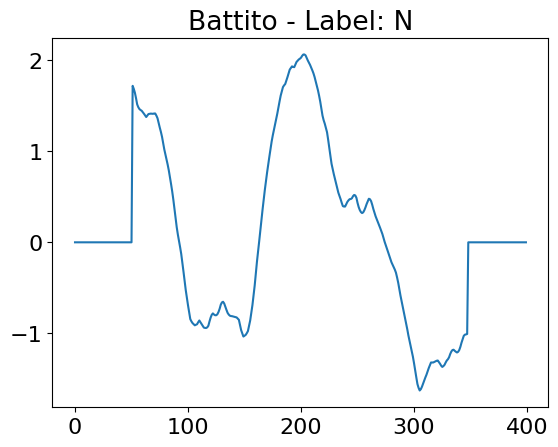

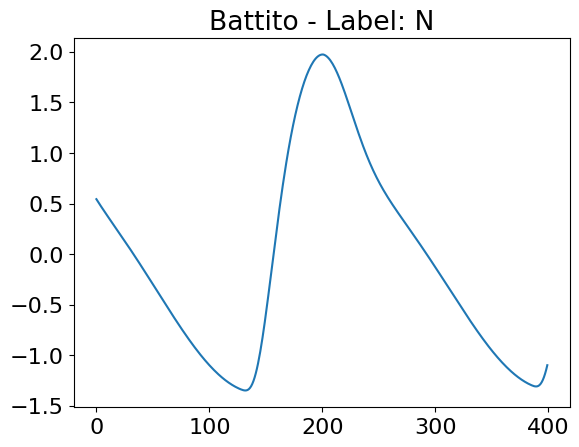

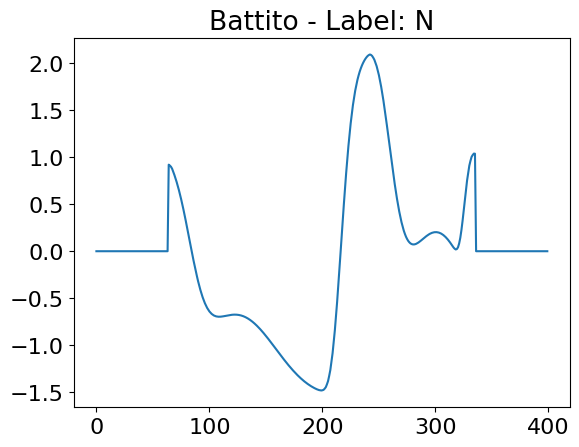

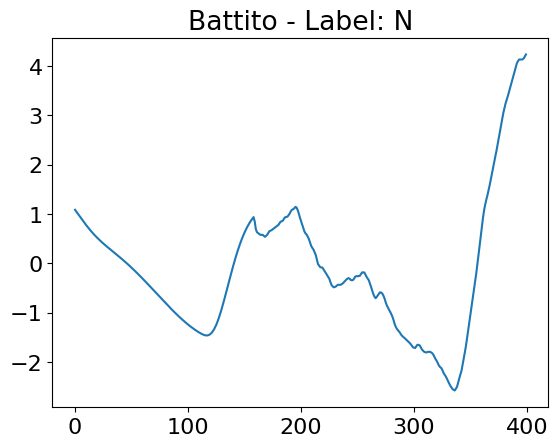

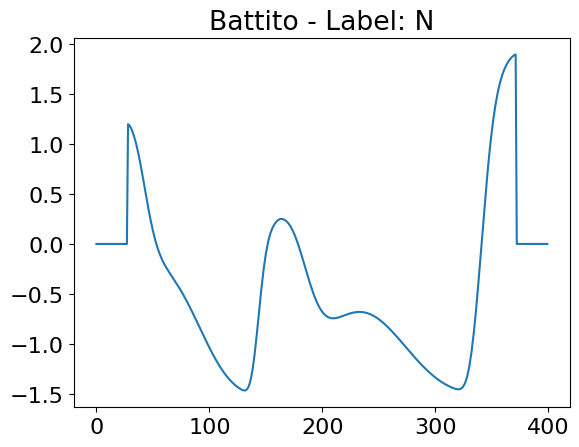

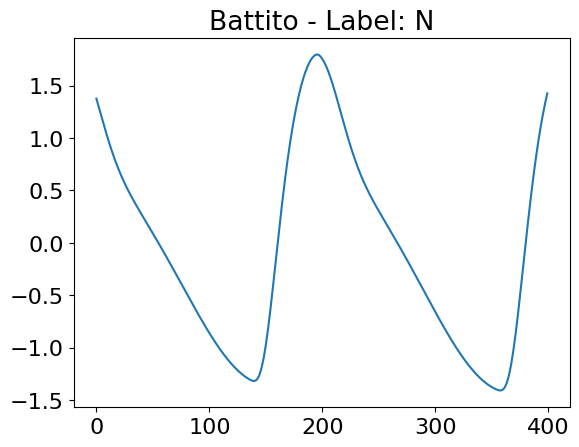

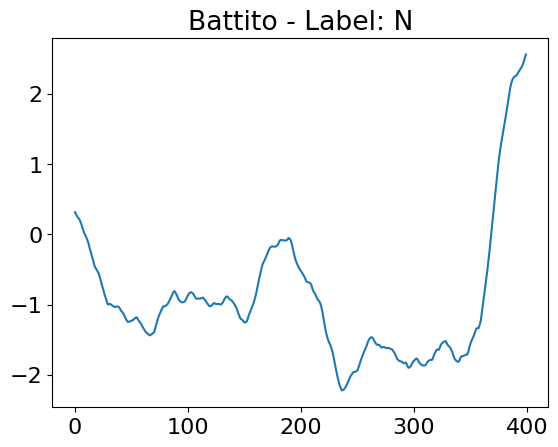

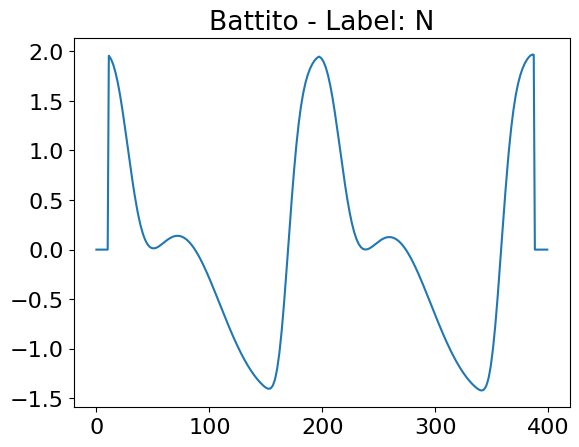

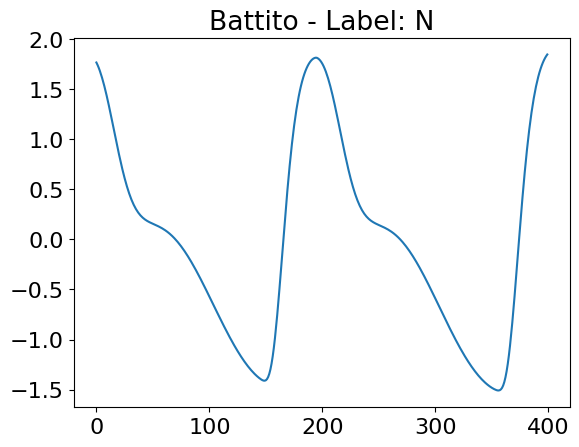

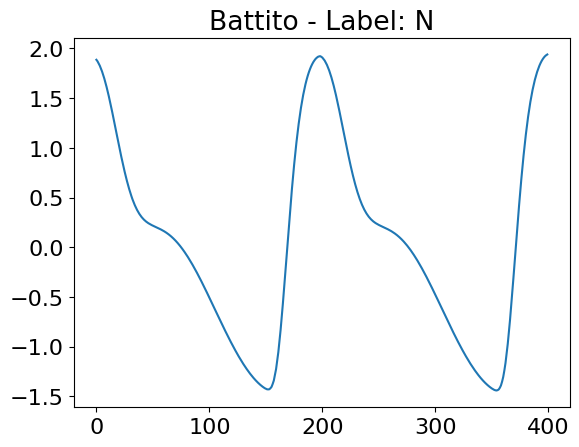

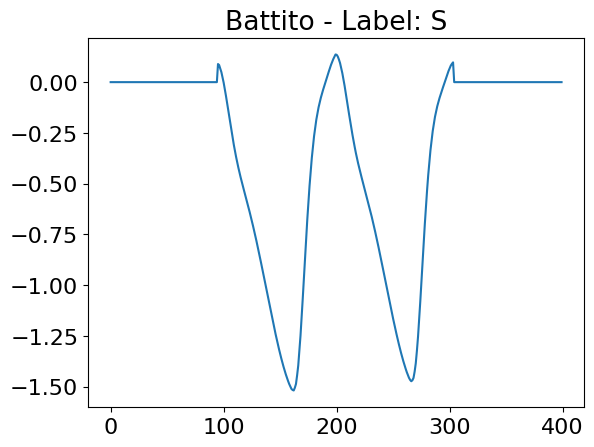

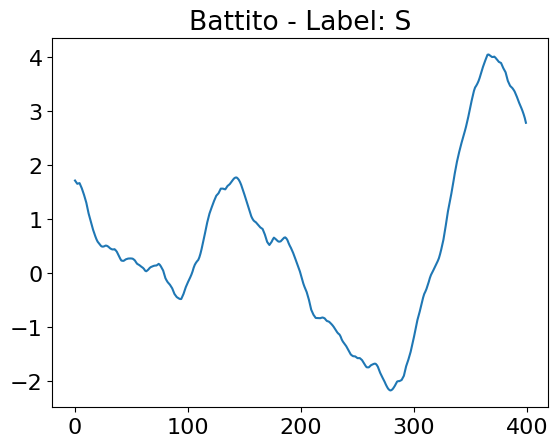

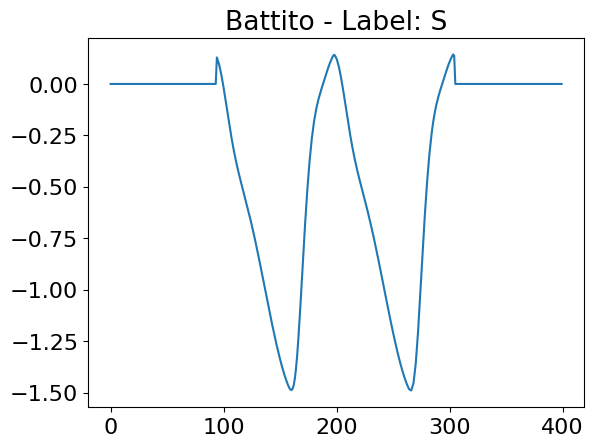

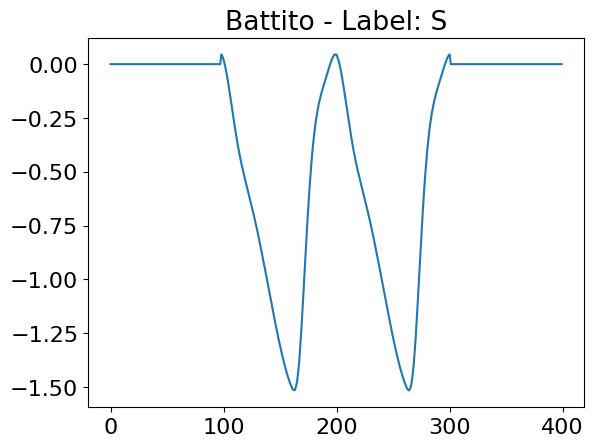

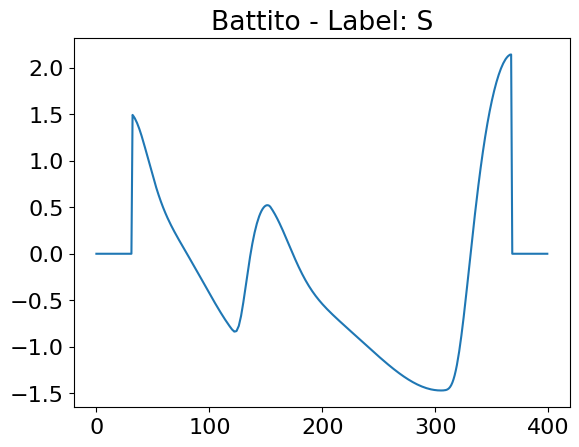

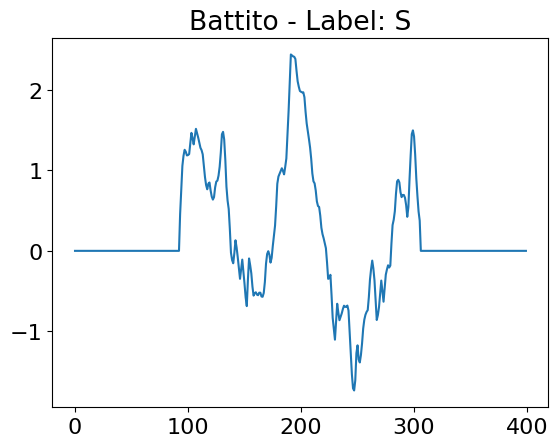

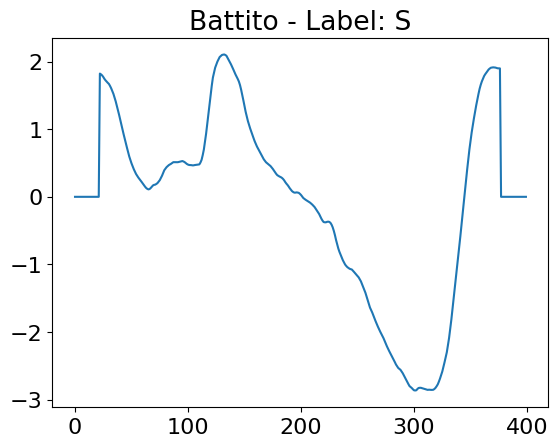

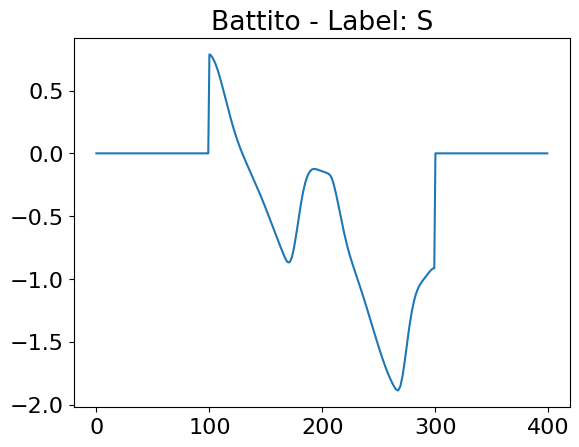

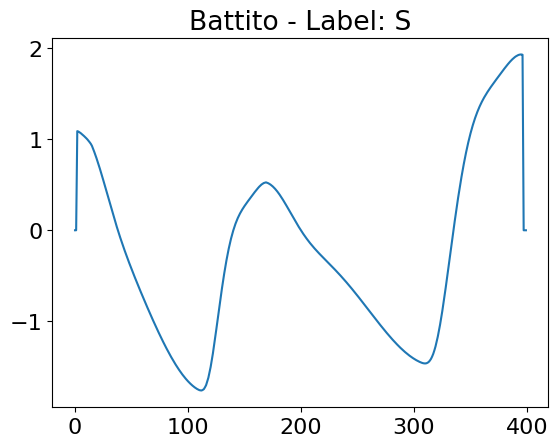

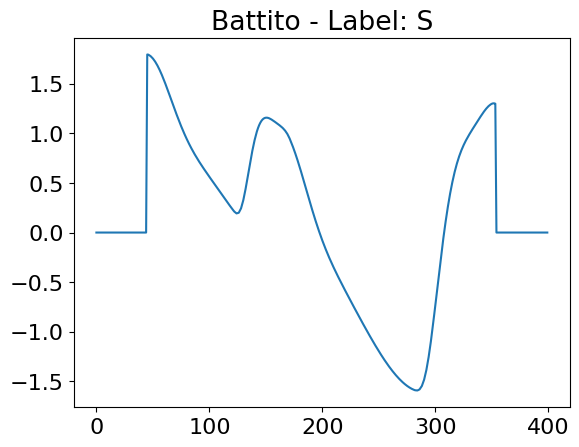

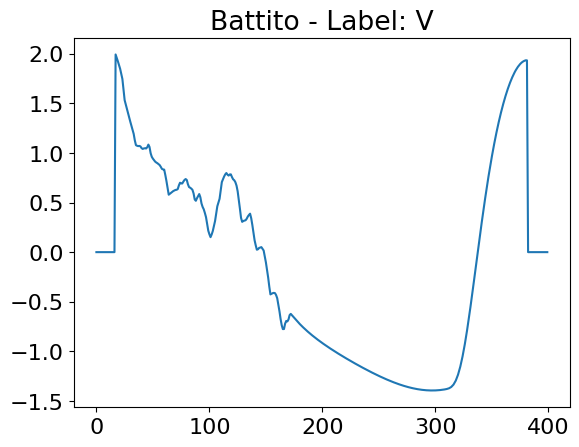

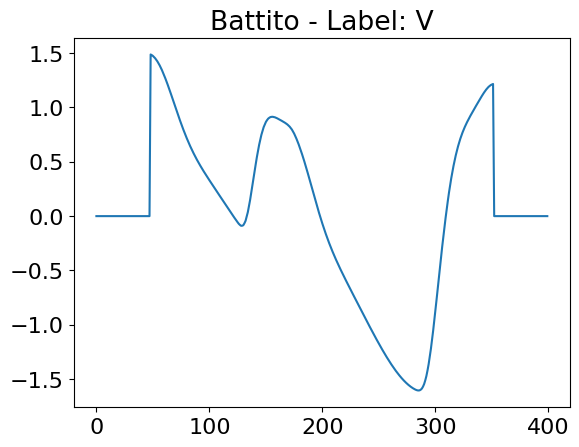

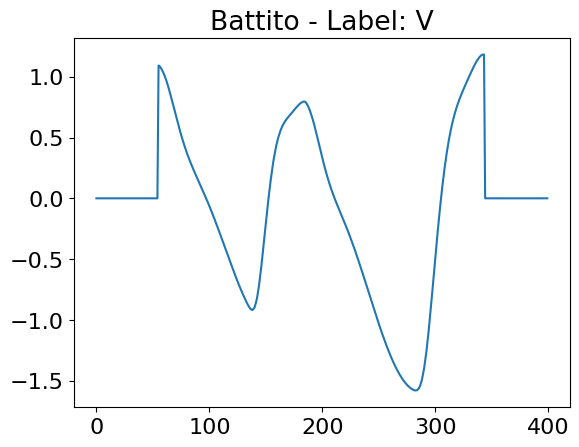

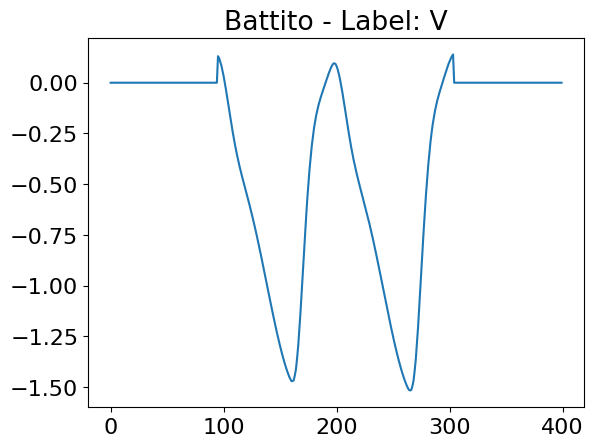

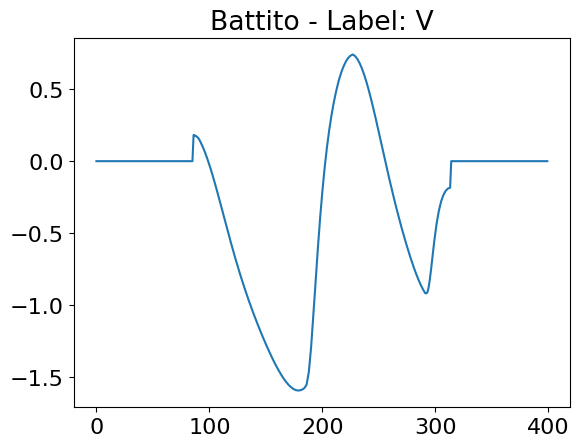

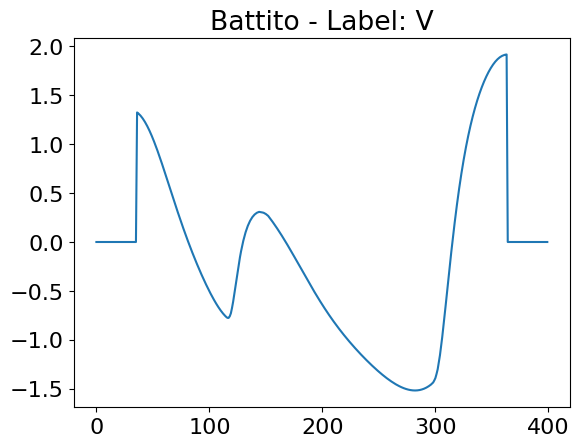

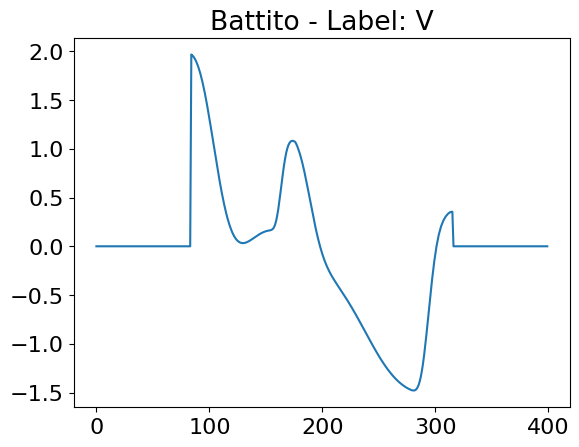

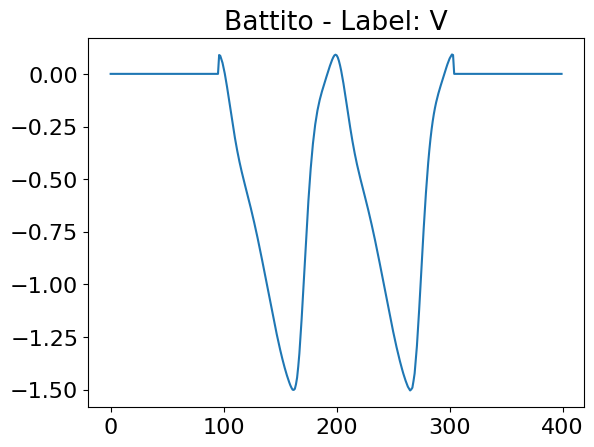

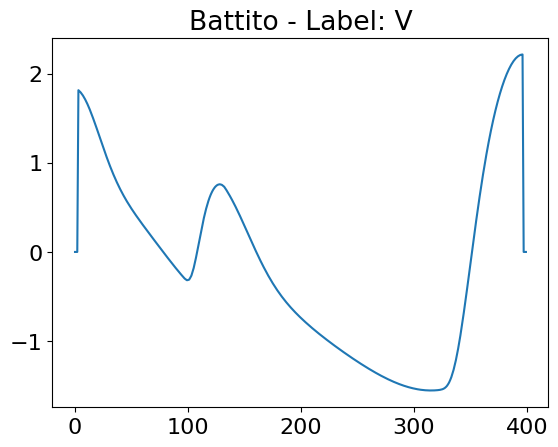

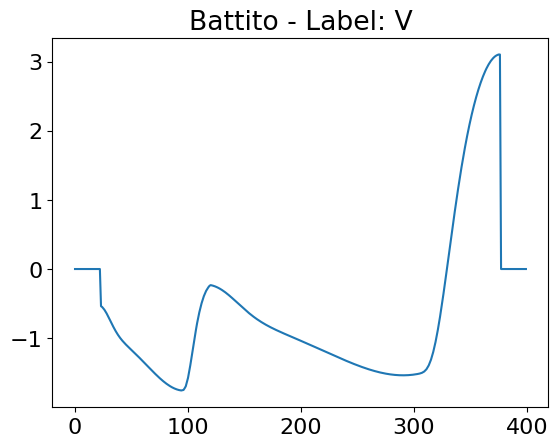

In [ ]:
# Funzione per visualizzare i battiti con le rispettive label
def plot_beats_with_labels(beats_array, labels_onehot, label_mapping, num_samples_per_class=10):
    num_classes = len(label_mapping)
    class_names = list(label_mapping.keys())

    for class_name in class_names:
        # Trova gli indici dei battiti per la classe specificata
        indices = [i for i, label in enumerate(labels_onehot) if np.argmax(label) == label_mapping[class_name]]

        # Seleziona un numero specifico di campioni per la classe
        selected_indices = np.random.choice(indices, num_samples_per_class, replace=False)

        for i in selected_indices:
            beat = beats_array[i]
            label_onehot = labels_onehot[i]

            # Plot del battito
            plt.figure()
            plt.plot(beat)
            plt.title(f'Battito - Label: {class_name}')
            plt.show()

# Visualizza 10 battiti di tipo 'N', 'S' e 'V' per il set di allenamento
plot_beats_with_labels(train_beats_array, train_beats_labels_onehot, label_mapping, num_samples_per_class=10)


N
[   89  9910  1098 10023  6633  9712  4376  3142  2793   637]
S
[14684 13956 14154 15023 11604 16347 11127 14222 11744 12997]
V
[15971 15404 17476 13894 13848 17125 12828 18039 14799 11150]


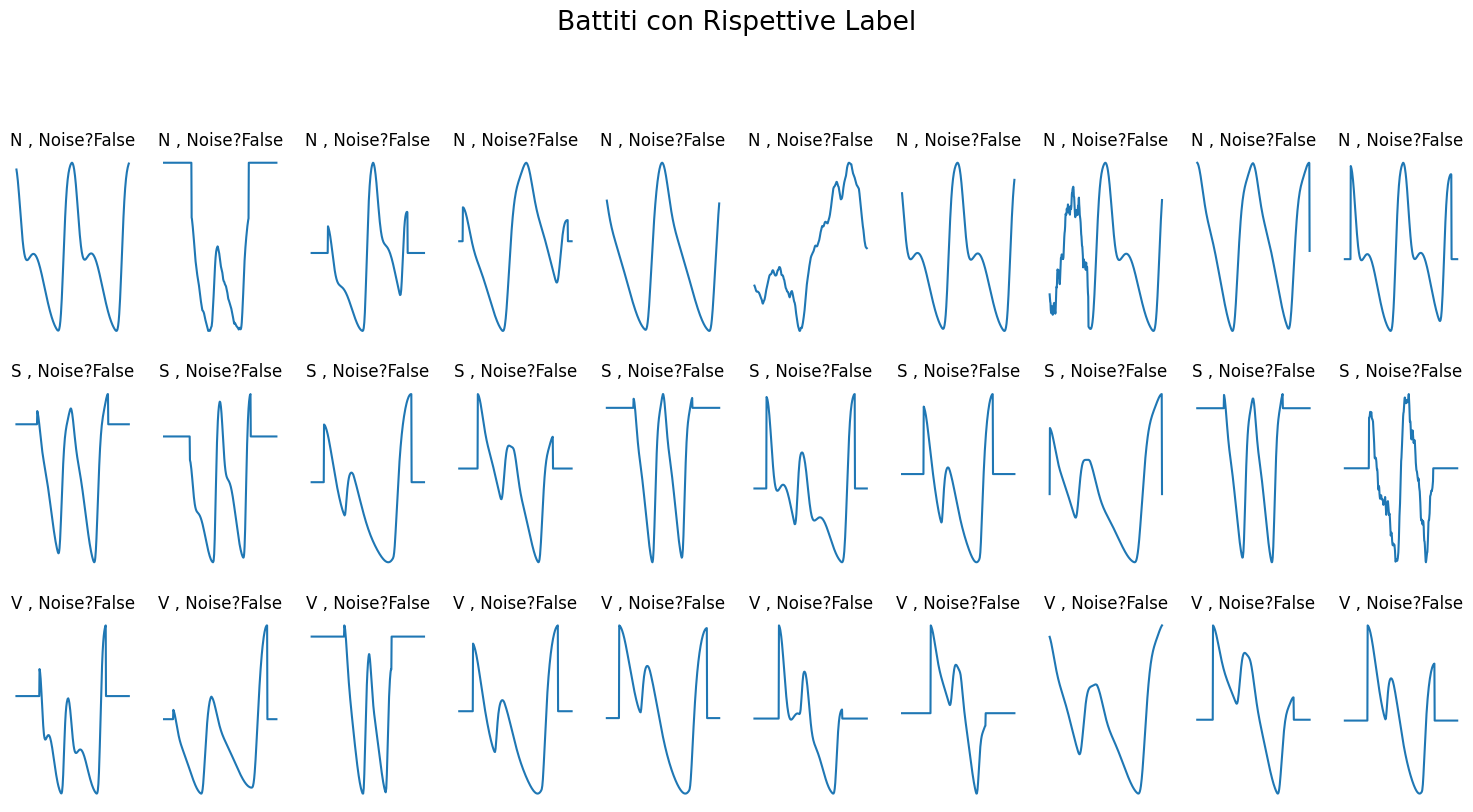

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Funzione per visualizzare i battiti con le rispettive label
def plot_beats_with_labels(beats_array, labels_onehot, label_mapping, num_samples_per_class=10):
    num_classes = len(label_mapping)
    class_names = list(label_mapping.keys())

    # Creazione di una griglia di subplots
    fig, axes = plt.subplots(nrows=num_classes, ncols=num_samples_per_class, figsize=(15, 8))
    fig.suptitle('Battiti con Rispettive Label', y=1.02)

    for i, class_name in enumerate(class_names):
        # Trova gli indici dei battiti per la classe specificata
        indices = [j for j, label in enumerate(labels_onehot) if np.argmax(label) == label_mapping[class_name]]
        print(class_name)
        # Seleziona un numero specifico di campioni per la classe
        selected_indices = np.random.choice(indices, num_samples_per_class, replace=False)
        print(selected_indices)

        for j, index in enumerate(selected_indices):
            beat = beats_array[index]

            is_noise = is_noise_check(beat)
            # Plot del battito nel subplot corrispondente
            axes[i, j].plot(beat)
            axes[i, j].set_title(f'{class_name} , Noise?{is_noise}',fontsize=12)
            axes[i, j].axis('off')  # Nascondi gli assi

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Visualizza 10 battiti di tipo 'N', 'S' e 'V' in una griglia per il set di allenamento
plot_beats_with_labels(train_beats_array, train_beats_labels_onehot, label_mapping, num_samples_per_class=10)


In [ ]:
# #IS NOISE?
# # train_beats_array[18699] e dintorni sono tutti segnali con rumore ma comunque segnali di battiti
# # mentre indici in cui è solo rumore li classifica correttamente come rumore

# frequencies, spectr_data = visualizza_spettrogramma(val_beats_array[12334], fs=250, nperseg=400, noverlap=0)

# soglia_alte_frequenze=5
# soglia_rumore=0.1

# # Calcola la somma della potenza nelle alte frequenze
# potenza_alte_frequenze_battito = np.sum(spectr_data[frequencies > soglia_alte_frequenze, :])
# print(potenza_alte_frequenze_battito)

# # Classifica il battito in base alla soglia
# rumore = potenza_alte_frequenze_battito > soglia_rumore

# print(rumore)
# # Aggiungi la classificazione alla lista
# #classificazione_battiti.append(rumore)

# #0.02329117847935552

# #0.0030973897866038297

### BEATS PREPROCESSING

In [ ]:
# #DA TOGLIERE

# #remove noise beat
# def rimuovi_beat_rumore(train, labels):
#     # Inizializza le liste per i segnali e le etichette senza rumore
#     train_senza_rumore = []
#     labels_senza_rumore = []

#     # Itera su segnali e etichette utilizzando zip
#     for segnale, label in zip(train, labels):
#         # Verifica se il segnale è rumore usando la funzione is_noise_check
#         if not is_noise_check(segnale):
#             # Aggiungi il segnale e la label corrispondente alle liste senza rumore
#             train_senza_rumore.append(segnale)
#             labels_senza_rumore.append(label)

#     # Converti le liste in array numpy
#     train_senza_rumore = np.array(train_senza_rumore)
#     labels_senza_rumore = np.array(labels_senza_rumore)

#     return train_senza_rumore, labels_senza_rumore

# # Applica la funzione alle fasi di train, val e test
# train_beats_array_senza_rumore, train_beats_labels_senza_rumore = rimuovi_beat_rumore(train_beats_array, train_beats_labels_onehot)
# val_beats_array_senza_rumore, val_beats_labels_senza_rumore = rimuovi_beat_rumore(val_beats_array, val_beats_labels_onehot)
# test_beats_array_senza_rumore, test_beats_labels_senza_rumore = rimuovi_beat_rumore(test_beats_array, test_beats_labels_onehot)

# print(train_beats_array_senza_rumore.shape)
# print(train_beats_labels_senza_rumore.shape)

# print(val_beats_array_senza_rumore.shape)
# print(val_beats_labels_senza_rumore.shape)

# print(test_beats_array_senza_rumore.shape)
# print(test_beats_labels_senza_rumore.shape)

In [ ]:
# train_beats_array = train_beats_array_senza_rumore
# val_beats_array = val_beats_array_senza_rumore
# test_beats_array = test_beats_array_senza_rumore

# train_beats_labels_onehot= train_beats_labels_senza_rumore
# val_beats_labels_onehot= val_beats_labels_senza_rumore
# test_beats_labels_onehot = test_beats_labels_senza_rumore

MIN-MAX TRA 0-1

In [ ]:
def min_max_normalize(data_array):
    min_val = np.min(data_array)
    max_val = np.max(data_array)
    normalized_data = (data_array - min_val) / (max_val - min_val)
    return normalized_data

In [ ]:
# Normalizzazione per train_beats_array
normalized_train_beats = np.array([min_max_normalize(beat) for beat in train_beats_array])

# Normalizzazione per val_beats_array
normalized_val_beats = np.array([min_max_normalize(beat) for beat in val_beats_array])

# Normalizzazione per test_beats_array
normalized_test_beats = np.array([min_max_normalize(beat) for beat in test_beats_array])

print(normalized_train_beats.shape)
print(normalized_val_beats.shape)
print(normalized_test_beats.shape)

(18078, 400)
(4979, 400)
(4568, 400)


In [ ]:
print(normalized_train_beats[11303].shape)

(400,)


N
[2882  858 2534 1014 2687 4100 3208 2221 1105  914]
S
[4213 4345 4177 4290 4548 4163 4108 4436 4334 4552]
V
[4165 4252 4125 4330 4543 4316 4412 4315 4490 4328]


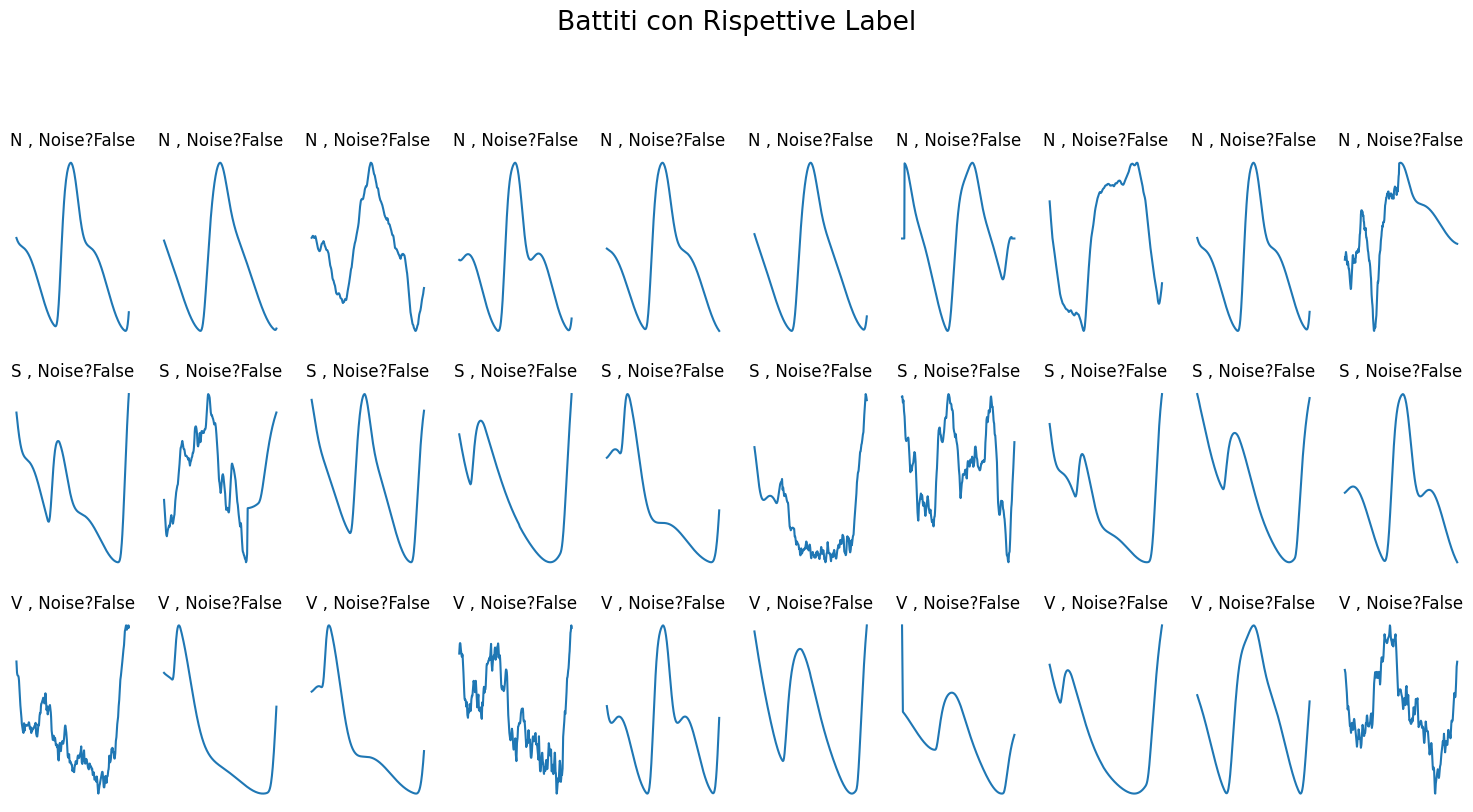

In [ ]:
# Visualizza 10 battiti di tipo 'N', 'S' e 'V' per il set di allenamento
plot_beats_with_labels(normalized_test_beats, test_beats_labels_onehot, label_mapping, num_samples_per_class=10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.utils import class_weight


In [ ]:
train_beats_labels_onehot.shape

(18078, 2)

In [ ]:
normalized_train_beats = normalized_train_beats[:,:, np.newaxis]
normalized_val_beats = normalized_val_beats[:,:, np.newaxis]
normalized_test_beats = normalized_test_beats[:,:, np.newaxis]

print('TRAIN:')
print(normalized_train_beats.shape)
print(train_beats_labels_onehot.shape)

print('VAL:')
print(normalized_val_beats.shape)
print(val_beats_labels_onehot.shape)

print('TEST:')
print(normalized_test_beats.shape)
print(test_beats_labels_onehot.shape)

TRAIN:
(18078, 400, 1)
(18078, 2)
VAL:
(4979, 400, 1)
(4979, 2)
TEST:
(4568, 400, 1)
(4568, 2)


In [ ]:
#SHUFFLE DATA
# Shuffling per il set di allenamento
train_indices = np.arange(len(normalized_train_beats))
np.random.shuffle(train_indices)

normalized_train_beats = normalized_train_beats[train_indices]
train_beats_labels_onehot = train_beats_labels_onehot[train_indices]

# Shuffling per il set di validazione
val_indices = np.arange(len(normalized_val_beats))
np.random.shuffle(val_indices)

normalized_val_beats = normalized_val_beats[val_indices]
val_beats_labels_onehot = val_beats_labels_onehot[val_indices]

# Shuffling per il set di test
test_indices = np.arange(len(normalized_test_beats))
np.random.shuffle(test_indices)

normalized_test_beats = normalized_test_beats[test_indices]
test_beats_labels_onehot = test_beats_labels_onehot[test_indices]

##MODELS

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras import layers, Sequential
from keras.layers import Input, Add, Dense, Activation, ZeroPadding1D, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import Model

In [ ]:
num_classes = train_beats_labels_onehot.shape[1]
num_classes

2

In [ ]:
#WEIGHT CLASSES:
from sklearn.utils.class_weight import compute_class_weight

def calculating_class_weights(y_true):
    num_classes = y_true.shape[1]
    weights = np.empty([num_classes, 2])
    for i in range(num_classes):
        weights[i] = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_true[:, i])
    return weights

# Supponendo che y_train sia la tua variabile train_beats_labels_onehot
class_weights = calculating_class_weights(train_beats_labels_onehot)

# Modifica le chiavi per rappresentare le tue classi (0, 1, 2)
keys = np.arange(num_classes)
weight_dictionary_fold = dict(zip(keys, class_weights.T[1]))
weight_dictionary_fold

{0: 0.8269899359560842, 1: 1.2645495243424734}

IMPORTANTE: PORTO LE LABEL TRA 0 E 1.

In [ ]:
y_train_single = np.argmax(train_beats_labels_onehot, axis=1)
y_val_single = np.argmax(val_beats_labels_onehot, axis=1)
y_test_single = np.argmax(test_beats_labels_onehot, axis=1)

In [ ]:
np.save('y_train_single.npy', y_train_single)
np.save('y_val_single.npy', y_val_single)
np.save('y_test_single.npy', y_test_single)

np.save('normalized_train_beats.npy', y_train_single)
np.save('normalized_val_beats.npy', y_val_single)
np.save('normalized_test_beats.npy', y_test_single)

np.save('class_weight',weight_dictionary_fold)

###BASIC CNN

In [ ]:
cnn_model = keras.Sequential([
    keras.layers.Conv1D(filters=16, kernel_size=3, padding='valid',
                        activation='relu', input_shape=(400, 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(filters=64, kernel_size=3,
                        padding='valid', activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation=tf.nn.sigmoid) #*********************1 neurone******************
])


learning_rate = 0.001
cnn_model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 398, 16)           64        
                                                                 
 max_pooling1d (MaxPooling1  (None, 199, 16)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 197, 64)           3136      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 98, 64)            0         
 g1D)                                                            
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                        

In [ ]:
history = cnn_model.fit(
    x = normalized_train_beats,
    y = y_train_single,
    validation_data=(normalized_val_beats, y_val_single),
    batch_size = 256,
    epochs = 50,
    #class_weight = weight_dictionary_fold
).history

Epoch 1/50
71/71 [==============================] - 8s 14ms/step - loss: 0.6629 - accuracy: 0.6011 - val_loss: 0.5570 - val_accuracy: 0.7755
Epoch 2/50
71/71 [==============================] - 0s 7ms/step - loss: 0.6342 - accuracy: 0.6221 - val_loss: 0.5312 - val_accuracy: 0.7710
Epoch 3/50
71/71 [==============================] - 1s 7ms/step - loss: 0.6206 - accuracy: 0.6276 - val_loss: 0.5363 - val_accuracy: 0.7749
Epoch 4/50
71/71 [==============================] - 1s 7ms/step - loss: 0.6050 - accuracy: 0.6356 - val_loss: 0.5315 - val_accuracy: 0.7662
Epoch 5/50
71/71 [==============================] - 1s 7ms/step - loss: 0.5870 - accuracy: 0.6510 - val_loss: 0.5431 - val_accuracy: 0.7658
Epoch 6/50
71/71 [==============================] - 1s 9ms/step - loss: 0.5687 - accuracy: 0.6775 - val_loss: 0.5536 - val_accuracy: 0.7638
Epoch 7/50
71/71 [==============================] - 1s 11ms/step - loss: 0.5499 - accuracy: 0.7043 - val_loss: 0.5552 - val_accuracy: 0.7588
Epoch 8/50
71/71 [

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
cnn_model.save('cnn_model-Final')

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = cnn_model.predict(normalized_val_beats)

fpr, tpr, thresholds = roc_curve(y_val_single, y_pred_prob)
roc_auc = auc(fpr, tpr)

optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print(optimal_threshold)

0.15965645


In [ ]:
y_pred_prob = cnn_model.predict(normalized_test_beats)
y_pred_05 = (y_pred_prob > 0.15965645).astype(int)

# Calcola l'accuracy
accuracy = accuracy_score(y_test_single, y_pred_05)
print(f'Accuracy: {accuracy}')

# Calcola la precision
precision = precision_score(y_test_single, y_pred_05)
print(f'Precision: {precision}')

# Calcola il recall
recall = recall_score(y_test_single, y_pred_05)
print(f'Recall: {recall}')

# Calcola l'F1-score
f1 = f1_score(y_test_single, y_pred_05)
print(f'F1 Score: {f1}')

# Matrice di confusione
conf_matrix = confusion_matrix(y_test_single, y_pred_05)
print(f'Confusion Matrix:\n{conf_matrix}')


143/143 [==============================] - 0s 2ms/step
Accuracy: 0.6928633975481612
Precision: 0.206875
Recall: 0.7118279569892473
F1 Score: 0.32058111380145277
Confusion Matrix:
[[2834 1269]
 [ 134  331]]


In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.15.0


In [ ]:
def build_1DCNN_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(cnn)
    gap = tfkl.GlobalAveragePooling1D()(cnn)
    dropout = tfkl.Dropout(.5, seed=seed)(gap)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='sigmoid')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.BinaryCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='recall')

    # Return the model
    return model

In [ ]:
model = build_1DCNN_classifier((400, 1), num_classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 400, 1)]          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 400, 128)          512       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 200, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 200, 128)          49280     
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0     

In [ ]:
# Train the model
history = model.fit(
    x = normalized_train_beats,
    y = train_beats_labels_onehot,
    validation_data=(normalized_val_beats, val_beats_labels_onehot),
    batch_size = 128,
    epochs = 200,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ],
    #class_weight = weight_dictionary_fold

).history

Epoch 1/200
136/136 [==============================] - 7s 27ms/step - loss: 0.6909 - accuracy: 0.4928 - val_loss: 0.6675 - val_accuracy: 0.6926 - lr: 0.0010
Epoch 2/200
136/136 [==============================] - 1s 10ms/step - loss: 0.6720 - accuracy: 0.5956 - val_loss: 0.6510 - val_accuracy: 0.6896 - lr: 0.0010
Epoch 3/200
136/136 [==============================] - 1s 10ms/step - loss: 0.6449 - accuracy: 0.6522 - val_loss: 0.6399 - val_accuracy: 0.7018 - lr: 0.0010
Epoch 4/200
136/136 [==============================] - 1s 10ms/step - loss: 0.6099 - accuracy: 0.6833 - val_loss: 0.5688 - val_accuracy: 0.7560 - lr: 0.0010
Epoch 5/200
136/136 [==============================] - 1s 10ms/step - loss: 0.5770 - accuracy: 0.7158 - val_loss: 0.5232 - val_accuracy: 0.7681 - lr: 0.0010
Epoch 6/200
136/136 [==============================] - 1s 10ms/step - loss: 0.5466 - accuracy: 0.7390 - val_loss: 0.4862 - val_accuracy: 0.7839 - lr: 0.0010
Epoch 7/200
136/136 [==============================] - 1s 

###VGG

In [ ]:
vgg_weight = Sequential()

vgg_weight.add(Conv1D(input_shape=(400,1),filters=64,kernel_size=3,padding="valid", activation="relu"))
vgg_weight.add(Conv1D(filters=64,kernel_size=3,padding="valid", activation="relu"))
vgg_weight.add(MaxPooling1D(pool_size=2,strides=2))
vgg_weight.add(Conv1D(filters=128, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(Conv1D(filters=128, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(MaxPooling1D(pool_size=2,strides=2))
vgg_weight.add(Conv1D(filters=256, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(Conv1D(filters=256, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(Conv1D(filters=256, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(MaxPooling1D(pool_size=2,strides=2))
vgg_weight.add(Conv1D(filters=512, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(Conv1D(filters=512, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(Conv1D(filters=512, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(MaxPooling1D(pool_size=2,strides=2))
vgg_weight.add(Conv1D(filters=512, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(Conv1D(filters=512, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(Conv1D(filters=512, kernel_size=3, padding="valid", activation="relu"))
vgg_weight.add(MaxPooling1D(pool_size=2,strides=2))
vgg_weight.add(keras.layers.GlobalMaxPooling1D())
vgg_weight.add (Dense(512, activation='relu'))
#vgg_weight.add (Dropout(0.4))
vgg_weight.add (Dense(1,activation='sigmoid'))


learning_rate = 0.001
vgg_weight.compile(
    optimizer = keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = vgg_weight.fit(
    x = normalized_train_beats,
    y = y_train_single,
    validation_data=(normalized_val_beats, y_val_single),
    batch_size = 256,
    epochs = 50,
    class_weight = weight_dictionary_fold
).history

Epoch 1/50
71/71 [==============================] - 26s 227ms/step - loss: 0.7076 - accuracy: 0.5089 - val_loss: 0.5232 - val_accuracy: 0.8954
Epoch 2/50
71/71 [==============================] - 9s 121ms/step - loss: 0.6912 - accuracy: 0.5141 - val_loss: 0.4690 - val_accuracy: 0.9092
Epoch 3/50
71/71 [==============================] - 8s 117ms/step - loss: 0.5475 - accuracy: 0.6944 - val_loss: 0.4208 - val_accuracy: 0.8582
Epoch 4/50
71/71 [==============================] - 8s 107ms/step - loss: 0.2465 - accuracy: 0.9102 - val_loss: 0.2343 - val_accuracy: 0.9096
Epoch 5/50
71/71 [==============================] - 8s 117ms/step - loss: 0.2278 - accuracy: 0.9175 - val_loss: 0.1573 - val_accuracy: 0.9377
Epoch 6/50
71/71 [==============================] - 8s 107ms/step - loss: 0.2320 - accuracy: 0.9148 - val_loss: 0.1970 - val_accuracy: 0.9243
Epoch 7/50
71/71 [==============================] - 9s 121ms/step - loss: 0.2091 - accuracy: 0.9223 - val_loss: 0.1411 - val_accuracy: 0.9478
Epoch

KeyboardInterrupt: 

In [ ]:
vgg_weight.save('vgg_weight-Final')

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = vgg_weight.predict(normalized_val_beats)

fpr, tpr, thresholds = roc_curve(y_val_single, y_pred_prob)
roc_auc = auc(fpr, tpr)

optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print(optimal_threshold)

156/156 [==============================] - 2s 8ms/step
0.3464361


In [ ]:
y_pred_prob = vgg_weight.predict(normalized_test_beats)
y_pred_05 = (y_pred_prob > 0.3464361).astype(int)

# Calcola l'accuracy
accuracy = accuracy_score(y_test_single, y_pred_05)
print(f'Accuracy: {accuracy}')

# Calcola la precision
precision = precision_score(y_test_single, y_pred_05)
print(f'Precision: {precision}')

# Calcola il recall
recall = recall_score(y_test_single, y_pred_05)
print(f'Recall: {recall}')

# Calcola l'F1-score
f1 = f1_score(y_test_single, y_pred_05)
print(f'F1 Score: {f1}')

# Matrice di confusione
conf_matrix = confusion_matrix(y_test_single, y_pred_05)
print(f'Confusion Matrix:\n{conf_matrix}')


143/143 [==============================] - 5s 32ms/step
Accuracy: 0.9008318739054291
Precision: 0.5092592592592593
Recall: 0.7096774193548387
F1 Score: 0.5929919137466307
Confusion Matrix:
[[3785  318]
 [ 135  330]]


###RESNET

In [ ]:
# ResNet model definition


def ResBs_Conv(block_input, num_filters):

    # 0. Filter Block input and BatchNormalization
    block_shortcut = Conv1D(num_filters, kernel_size=7, strides=2,  padding='same')(block_input)
    block_shortcut = BatchNormalization()(block_shortcut)

    # 1. First Convolutional Layer
    conv1 = Conv1D(filters=num_filters, kernel_size=7, strides=2, padding='same')(block_input)
    norm1 = BatchNormalization()(conv1)
    relu1 = Activation('relu')(norm1)
    dropout = Dropout(0.2)(relu1)

    # 2. Second Convolutional Layer
    conv2 = Conv1D(num_filters, kernel_size=7, padding='same')(dropout) # per avere concordanza
    norm2 = BatchNormalization()(conv2)

    # 3. Summing Layer (adding a residual connection)
    sum = Add()([block_shortcut, norm2])

    # 4. Activation Layer
    relu2 = Activation('relu')(sum)

    return relu2

def ResBs_Identity(block_input, num_filters):

    # 1. First Convolutional Layer
    conv1 = Conv1D(filters=num_filters, kernel_size=7, padding= 'same')(block_input)
    norm1 = BatchNormalization()(conv1)
    relu1 = Activation('relu')(norm1)
    dropout = Dropout(0.2)(relu1)

    # 2. Second Convolutional Layer
    conv2 = Conv1D(num_filters, kernel_size=7, padding= 'same')(dropout) #per avere concordanza
    norm2 = BatchNormalization()(conv2)

    # 3. Summing Layer (adding a residual connection)
    sum = Add()([block_input, norm2])

    # 4. Activation Layer
    relu2 = Activation('relu')(sum)

    return relu2

def resnet(N=8, ch=12, win_len=5000, classes=9):
    ecg_input = Input(shape=(win_len, ch), name='ecg_signal')

    ResNet = Conv1D(filters=64,kernel_size=15, padding = 'same')(ecg_input)
    ResNet = BatchNormalization()(ResNet)
    ResNet = Activation('relu')(ResNet)
    ResNet = MaxPooling1D(pool_size=2, strides = 2)(ResNet)

    # B.5 ResBs (x8) blocks
    # First two ResNet blocks are identity blocks
    ResNet = ResBs_Identity(ResNet, 64)
    ResNet = ResBs_Identity(ResNet, 64)

    filters = 64
    M = int((N - 2)/2)
    for i in range(M):
        filters = filters * 2
        # define N-th ResBs block
        ResNet = ResBs_Conv(ResNet, filters)
        ResNet = ResBs_Identity(ResNet, filters)

    ResNet = GlobalMaxPooling1D(name='gmp_layer')(ResNet)
    ResNet = Flatten()(ResNet)

    # Sigmoid activation function on the last layer
    ResNet = Dense(classes, activation='sigmoid',  name='sigmoid_classifier')(ResNet)

    # Finally the model is composed by connecting inputs to outputs:
    model = Model(inputs=[ecg_input],outputs=ResNet)

    return model


In [ ]:
from keras.layers import Input, Add, Dense, Activation, ZeroPadding1D, Flatten, GlobalAveragePooling1D,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout,concatenate, BatchNormalization, Reshape

resNet_model = resnet(N=8, ch=1, win_len=400, classes=1) # *****************1 perche binary)

learning_rate = 0.001
resNet_model.compile(
    optimizer = keras.optimizers.Adam(),
    loss=tfk.losses.BinaryCrossentropy(),
    metrics = ['accuracy', 'Precision', 'Recall' ]
)
resNet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ecg_signal (InputLayer)     [(None, 400, 1)]             0         []                            
                                                                                                  
 conv1d_15 (Conv1D)          (None, 400, 64)              1024      ['ecg_signal[0][0]']          
                                                                                                  
 batch_normalization (Batch  (None, 400, 64)              256       ['conv1d_15[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 400, 64)              0         ['batch_normalization[0][0

In [ ]:
history = resNet_model.fit(
    x = normalized_train_beats,
    y = y_train_single,
    validation_data=(normalized_val_beats, y_val_single),
    batch_size = 256,
    epochs = 50,
    class_weight = weight_dictionary_fold
).history

Epoch 1/50
71/71 [==============================] - 43s 296ms/step - loss: 0.4820 - accuracy: 0.8704 - precision: 0.8116 - recall: 0.8753 - val_loss: 0.8331 - val_accuracy: 0.7757 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
71/71 [==============================] - 14s 199ms/step - loss: 0.1944 - accuracy: 0.9299 - precision: 0.8907 - recall: 0.9379 - val_loss: 0.5787 - val_accuracy: 0.7757 - val_precision: 0.5000 - val_recall: 8.9526e-04
Epoch 3/50
71/71 [==============================] - 14s 203ms/step - loss: 0.1703 - accuracy: 0.9378 - precision: 0.8999 - recall: 0.9482 - val_loss: 0.3388 - val_accuracy: 0.8002 - val_precision: 0.8910 - val_recall: 0.1244
Epoch 4/50
71/71 [==============================] - 14s 204ms/step - loss: 0.1610 - accuracy: 0.9398 - precision: 0.9032 - recall: 0.9494 - val_loss: 0.2573 - val_accuracy: 0.9426 - val_precision: 0.8108 - val_recall: 0.9705
Epoch 5/50
71/71 [==============================] - 14s 203ms/step - loss: 0.1778 - accu

KeyboardInterrupt: 

In [ ]:
resNet_model.save('resnet-Final')

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = resNet_model.predict(normalized_val_beats)

fpr, tpr, thresholds = roc_curve(y_val_single, y_pred_prob)
roc_auc = auc(fpr, tpr)

optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print(optimal_threshold)

156/156 [==============================] - 3s 12ms/step
0.62948537


In [ ]:
y_pred_prob = resNet_model.predict(normalized_test_beats)
y_pred_05 = (y_pred_prob > 0.3).astype(int)

# Calcola l'accuracy
accuracy = accuracy_score(y_test_single, y_pred_05)
print(f'Accuracy: {accuracy}')

# Calcola la precision
precision = precision_score(y_test_single, y_pred_05)
print(f'Precision: {precision}')

# Calcola il recall
recall = recall_score(y_test_single, y_pred_05)
print(f'Recall: {recall}')

# Calcola l'F1-score
f1 = f1_score(y_test_single, y_pred_05)
print(f'F1 Score: {f1}')

# Matrice di confusione
conf_matrix = confusion_matrix(y_test_single, y_pred_05)
print(f'Confusion Matrix:\n{conf_matrix}')


143/143 [==============================] - 2s 11ms/step
Accuracy: 0.8813485113835376
Precision: 0.4534461910519952
Recall: 0.8064516129032258
F1 Score: 0.5804953560371517
Confusion Matrix:
[[3651  452]
 [  90  375]]


###RESNET_CBAM

In [ ]:
#hint: use tf.reduce_mean(in_block, axis=()) for avg pooling
# and tf.reduce_max(in_block, axis=()) for max pooling

def CBAM_block(in_block, ch, ratio=16):

    """
    @Convolutional Block Attention Module
    """

    _, length, channel = in_block.get_shape()  # (B, L, C)

    # channel attention
    avg_pool = tf.reduce_mean(in_block, axis=(1), keepdims=True)   # (B, 1, C)
    max_pool = tf.reduce_max(in_block, axis=(1), keepdims=True)  # (B, 1, C)

    dense1 = Dense(ch//ratio, activation='relu')
    avg_reduced = dense1(avg_pool) # (B, 1, C // r)
    max_reduced = dense1(max_pool) # (B, 1, C // r)

    dense2 = Dense(ch)
    avg_attention = dense2(avg_reduced) # (B, 1, C)
    max_attention = dense2(max_reduced) # (B, 1, C)

    x = tf.add(avg_attention, max_attention)   # (B, 1, C)
    x = tf.nn.sigmoid(x)        # (B, 1, C) to normalize attention scores between 0-1
    x = tf.multiply(in_block, x)   # (B, L, C)

    # spatial attention
    y_mean = tf.reduce_mean(x, axis=-1, keepdims=True)  # (B, L, 1)
    y_max = tf.reduce_max(x, axis=-1, keepdims=True)  # (B, L, 1)
    y = tf.concat([y_mean, y_max], axis=-1)     # (B, L, 2)
    y = tf.keras.layers.Conv1D(filters=1, kernel_size=7, padding='same', activation=tf.nn.sigmoid)(y)    # (B, L, 1)

    y = tf.multiply(x, y)  # (B, L, C)

    return y

In [ ]:
# ResNet with Convolutional Block Attention Module definition


def ResBs_CBAM_Conv(block_input, num_filters):

    # 0. Filter Block input and BatchNormalization
    block_input_short = Conv1D(num_filters, kernel_size=7, strides=2,  padding = 'valid')(block_input)
    block_input_short = BatchNormalization()(block_input_short)

    # 1. First Convolutional Layer
    conv1 = Conv1D(filters=num_filters, kernel_size=7, strides=2, padding= 'valid')(block_input)
    norm1 = BatchNormalization()(conv1)
    relu1 = Activation('relu')(norm1)
    dropout = Dropout(0.2)(relu1)

    # 2. Second Convolutional Layer
    conv2 = Conv1D(num_filters, kernel_size=7, padding= 'same')(dropout) #per avere concordanza
    norm2 = BatchNormalization()(conv2)

    # 3. CBAM block (fucntion defined above)
    CBAM = CBAM_block(norm2, ch=num_filters)

    # 4. Summing Layer (adding a residual connection)
    sum = Add()([block_input_short, CBAM])

    # 5. Activation Layer
    relu2 = Activation('relu')(sum)

    return relu2

def ResBs_CBAM_Identity(block_input, num_filters):

    # 1. First Convolutional Layer
    conv1 = Conv1D(filters=num_filters, kernel_size=7, padding= 'same')(block_input)
    norm1 = BatchNormalization()(conv1)
    relu1 = Activation('relu')(norm1)
    dropout = Dropout(0.2)(relu1)

    # 2. Second Convolutional Layer
    conv2 = Conv1D(num_filters, kernel_size=7, padding= 'same')(dropout) #per avere concordanza
    norm2 = BatchNormalization()(conv2)

    # 3. CBAM block (fucntion defined above)
    CBAM = CBAM_block(norm2, ch=num_filters)

    # 4. Summing Layer (adding a residual connection)
    sum = Add()([block_input, CBAM])
    # 5. Activation Layer
    relu2 = Activation('relu')(sum)

    return relu2

# model integrating deep + wide
def resnet_CBAM_deep_wide(N=8, ch=12, win_len=400, num_wide_features= 36, classes=9):
    # A. Wide features
    wide_input = Input(shape= (num_wide_features, ), name = 'wide_features')
    wide_branch = Dense(13, activation='relu')(wide_input)

    # B. ECG window input of shape (batch_size,  WINDOW_LEN, CHANNELS)
    ecg_input = Input(shape=(win_len, ch), name='ecg_signal')

    ResNet = Conv1D(filters=64,kernel_size=15, padding = 'same')(ecg_input)
    ResNet = BatchNormalization()(ResNet)
    ResNet = Activation('relu')(ResNet)
    ResNet = MaxPooling1D(pool_size=2, strides = 2)(ResNet)

    # B.5 ResBs (x8) blocks
    # The number of filters starts from 64 and doubles every two blocks

    # First two ResNet blocks are identity blocks
    ResNet = ResBs_CBAM_Identity(ResNet, 64)
    ResNet = ResBs_CBAM_Identity(ResNet, 64)

    filters = 64
    M= int((N -2 )/2)
    for i in range(M):
        filters = filters*2

        # define N-th ResBs block
        ResNet = ResBs_CBAM_Conv(ResNet, filters)
        ResNet = ResBs_CBAM_Identity(ResNet, filters)

    ResNet = GlobalMaxPooling1D(name='gmp_layer')(ResNet)
    ResNet = Flatten()(ResNet)

    shared_path = concatenate([ResNet, wide_branch], name='concat_layer')
    shared_path = Dense(classes, activation='sigmoid', name='sigmoid_classifier')(shared_path)

    # Finally the model is composed by connecting inputs to outputs:
    model = Model(inputs=[ecg_input,  wide_input],outputs=shared_path)

    return model

In [ ]:
from keras.layers import Input, Add, Dense, Activation, ZeroPadding1D, Flatten, GlobalAveragePooling1D,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout,concatenate, BatchNormalization, Reshape

resNetCBAM_model = resnet(N=8, ch=1, win_len=400, classes=1)

learning_rate = 0.001
resNetCBAM_model.compile(
    optimizer = keras.optimizers.Adam(),
    loss=tfk.losses.BinaryCrossentropy(),
    metrics = ['accuracy', 'Precision', 'Recall' ]
)
resNet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ecg_signal (InputLayer)     [(None, 400, 1)]             0         []                            
                                                                                                  
 conv1d_38 (Conv1D)          (None, 400, 64)              1024      ['ecg_signal[0][0]']          
                                                                                                  
 batch_normalization (Batch  (None, 400, 64)              256       ['conv1d_38[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 400, 64)              0         ['batch_normalization[0][0

In [ ]:
history = resNetCBAM_model.fit(
    x = normalized_train_beats,
    y = y_train_single,
    validation_data=(normalized_val_beats, y_val_single),
    batch_size = 256,
    epochs = 50,
    class_weight = weight_dictionary_fold
).history

Epoch 1/50
68/68 [==============================] - 34s 214ms/step - loss: 0.7801 - accuracy: 0.8519 - precision: 0.8519 - recall: 0.8519 - val_loss: 7.5832 - val_accuracy: 0.3025 - val_precision: 0.3025 - val_recall: 0.3025
Epoch 2/50
68/68 [==============================] - 13s 197ms/step - loss: 0.1935 - accuracy: 0.9308 - precision: 0.9308 - recall: 0.9308 - val_loss: 0.4538 - val_accuracy: 0.8833 - val_precision: 0.8833 - val_recall: 0.8833
Epoch 3/50
68/68 [==============================] - 14s 199ms/step - loss: 0.1959 - accuracy: 0.9298 - precision: 0.9298 - recall: 0.9298 - val_loss: 0.8743 - val_accuracy: 0.6975 - val_precision: 0.6975 - val_recall: 0.6975
Epoch 4/50
68/68 [==============================] - 14s 201ms/step - loss: 0.1867 - accuracy: 0.9331 - precision: 0.9331 - recall: 0.9331 - val_loss: 0.4789 - val_accuracy: 0.7286 - val_precision: 0.7286 - val_recall: 0.7286
Epoch 5/50
68/68 [==============================] - 14s 201ms/step - loss: 0.1719 - accuracy: 0.9360

KeyboardInterrupt: 

In [ ]:
y_pred_prob = vgg_weight.predict(normalized_val_beats)
y_pred_05 = (y_pred_prob > 0.5).astype(int)

# Calcola l'accuracy
accuracy = accuracy_score(y_val_single, y_pred_05)
print(f'Accuracy: {accuracy}')

# Calcola la precision
precision = precision_score(y_val_single, y_pred_05)
print(f'Precision: {precision}')

# Calcola il recall
recall = recall_score(y_val_single, y_pred_05)
print(f'Recall: {recall}')

# Calcola l'F1-score
f1 = f1_score(y_val_single, y_pred_05)
print(f'F1 Score: {f1}')

# Matrice di confusione
conf_matrix = confusion_matrix(y_val_single, y_pred_05)
print(f'Confusion Matrix:\n{conf_matrix}')


###LSTM

In [ ]:
def build_LSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    lstm = tfkl.LSTM(128, return_sequences=True)(input_layer)
    lstm = tfkl.LSTM(128)(lstm)
    dropout = tfkl.Dropout(.5, seed=seed)(lstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='sigmoid')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.BinaryCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics= 'accuracy')

    # Return the model
    return model

In [ ]:
model_LSTM = build_LSTM_classifier((400,1), 1)
model_LSTM.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 400, 1)]          0         
                                                                 
 lstm_12 (LSTM)              (None, 400, 128)          66560     
                                                                 
 lstm_13 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 214785 (839.00 KB)
Trainable params: 214785 (83

In [ ]:
# Train the model
history = model_LSTM.fit(
    x = normalized_train_beats,
    y = y_train_single,
    batch_size = 128,
    epochs = 200,
    validation_data = (normalized_val_beats, y_val_single),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor= 'val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
142/142 [==============================] - 13s 61ms/step - loss: 0.4867 - accuracy: 0.7595 - val_loss: 0.2964 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 2/200
142/142 [==============================] - 8s 56ms/step - loss: 0.2922 - accuracy: 0.8899 - val_loss: 0.2049 - val_accuracy: 0.9219 - lr: 0.0010
Epoch 3/200
142/142 [==============================] - 8s 55ms/step - loss: 0.3259 - accuracy: 0.8680 - val_loss: 0.2455 - val_accuracy: 0.9044 - lr: 0.0010
Epoch 4/200
142/142 [==============================] - 8s 60ms/step - loss: 0.2893 - accuracy: 0.8879 - val_loss: 0.2641 - val_accuracy: 0.8972 - lr: 0.0010
Epoch 5/200
142/142 [==============================] - 7s 53ms/step - loss: 0.3773 - accuracy: 0.8426 - val_loss: 0.2051 - val_accuracy: 0.9311 - lr: 0.0010
Epoch 6/200
 79/142 [===============>..............] - ETA: 2s - loss: 0.2798 - accuracy: 0.9011

KeyboardInterrupt: 

In [ ]:
model_LSTM.save('lstm-Final')

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = model_LSTM.predict(normalized_val_beats)

fpr, tpr, thresholds = roc_curve(y_val_single, y_pred_prob)
roc_auc = auc(fpr, tpr)

optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print(optimal_threshold)

156/156 [==============================] - 5s 27ms/step
0.17029236


In [ ]:
y_pred_prob = model_LSTM.predict(normalized_test_beats)
y_pred_05 = (y_pred_prob > optimal_threshold).astype(int)

# Calcola l'accuracy
accuracy = accuracy_score(y_test_single, y_pred_05)
print(f'Accuracy: {accuracy}')

# Calcola la precision
precision = precision_score(y_test_single, y_pred_05)
print(f'Precision: {precision}')

# Calcola il recall
recall = recall_score(y_test_single, y_pred_05)
print(f'Recall: {recall}')

# Calcola l'F1-score
f1 = f1_score(y_test_single, y_pred_05)
print(f'F1 Score: {f1}')

# Matrice di confusione
conf_matrix = confusion_matrix(y_test_single, y_pred_05)
print(f'Confusion Matrix:\n{conf_matrix}')


143/143 [==============================] - 2s 16ms/step
Accuracy: 0.8931698774080561
Precision: 0.48183254344391785
Recall: 0.6559139784946236
F1 Score: 0.5555555555555555
Confusion Matrix:
[[3775  328]
 [ 160  305]]


###BiLSTM

In [ ]:
def build_BiLSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(input_layer)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128))(bilstm)
    dropout = tfkl.Dropout(.5, seed=seed)(bilstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='sigmoid')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.BinaryCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model_biLSTM = build_BiLSTM_classifier((400,1), 1)
model_biLSTM.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 400, 1)]          0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 400, 256)          133120    
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 1)                 129   

In [ ]:
# Train the model
history = model_biLSTM.fit(
    x = normalized_train_beats,
    y = y_train_single,
    batch_size = 128,
    epochs = 200,
    validation_data = (normalized_val_beats, y_val_single),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
142/142 [==============================] - 26s 132ms/step - loss: 0.4664 - accuracy: 0.7678 - val_loss: 0.3126 - val_accuracy: 0.8873 - lr: 0.0010
Epoch 2/200
142/142 [==============================] - 18s 128ms/step - loss: 0.2408 - accuracy: 0.9164 - val_loss: 0.2902 - val_accuracy: 0.9134 - lr: 0.0010
Epoch 3/200
 14/142 [=>............................] - ETA: 13s - loss: 0.4442 - accuracy: 0.8421

KeyboardInterrupt: 

In [ ]:
model_biLSTM.save('bilstm-Final')

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = model_biLSTM.predict(normalized_val_beats)

fpr, tpr, thresholds = roc_curve(y_val_single, y_pred_prob)
roc_auc = auc(fpr, tpr)

optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print(optimal_threshold)

156/156 [==============================] - 5s 27ms/step
0.24224912


In [ ]:
y_pred_prob = model_biLSTM.predict(normalized_test_beats)
y_pred_05 = (y_pred_prob > optimal_threshold).astype(int)

# Calcola l'accuracy
accuracy = accuracy_score(y_test_single, y_pred_05)
print(f'Accuracy: {accuracy}')

# Calcola la precision
precision = precision_score(y_test_single, y_pred_05)
print(f'Precision: {precision}')

# Calcola il recall
recall = recall_score(y_test_single, y_pred_05)
print(f'Recall: {recall}')

# Calcola l'F1-score
f1 = f1_score(y_test_single, y_pred_05)
print(f'F1 Score: {f1}')

# Matrice di confusione
conf_matrix = confusion_matrix(y_test_single, y_pred_05)
print(f'Confusion Matrix:\n{conf_matrix}')


143/143 [==============================] - 5s 37ms/step
Accuracy: 0.8222416812609457
Precision: 0.2310077519379845
Recall: 0.3204301075268817
F1 Score: 0.26846846846846845
Confusion Matrix:
[[3607  496]
 [ 316  149]]


## EVALUATION

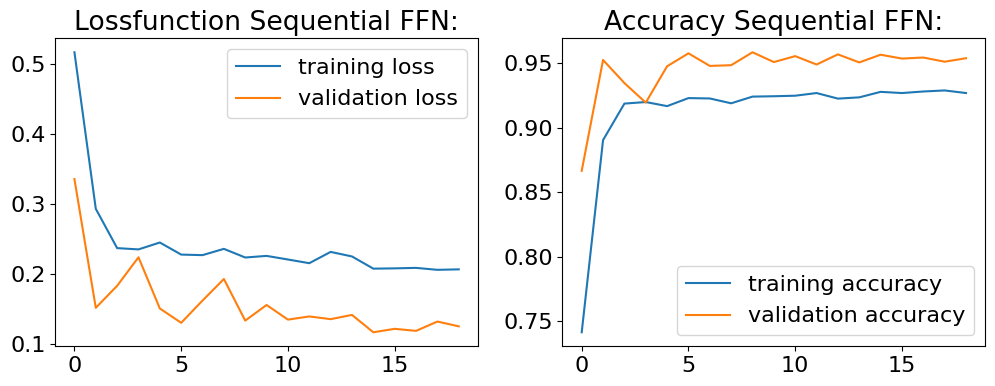

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history['loss'], label="training loss")
plt.plot(history['val_loss'], label="validation loss")
plt.title('Lossfunction Sequential FFN:')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history['accuracy'], label="training accuracy")
plt.plot(history['val_accuracy'], label="validation accuracy")
plt.title('Accuracy Sequential FFN:')
plt.legend()

QUESTO È IL RISULTATO DELLE PRIME PROVE CON UN CLASSIFICATORE ALLENATO SU TUTTE E TRE LE CLASSI

100/100 [==============================] - 1s 13ms/step


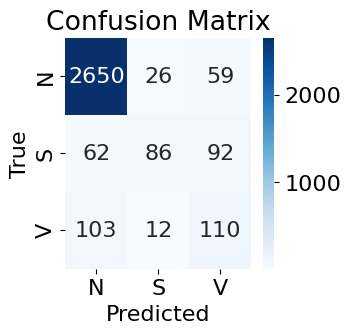

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Funzione per visualizzare la matrice di confusione
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(len(class_names), len(class_names)))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Valutazione del modello sulla fase di validazione
val_predictions = resNet_model.predict(normalized_test_beats)
val_predictions_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(test_beats_labels_onehot, axis=1)

# Visualizzazione della matrice di confusione per la fase di validazione
plot_confusion_matrix(val_true_classes, val_predictions_classes, class_names=["N", "S", "V"])
#plot_confusion_matrix(val_true_classes, val_predictions_classes, class_names=["N", "notN"])

116/116 [==============================] - 3s 12ms/step
Accuracy: 0.8532
Precision: 0.689
Recall: 0.6755
F1: 0.6739


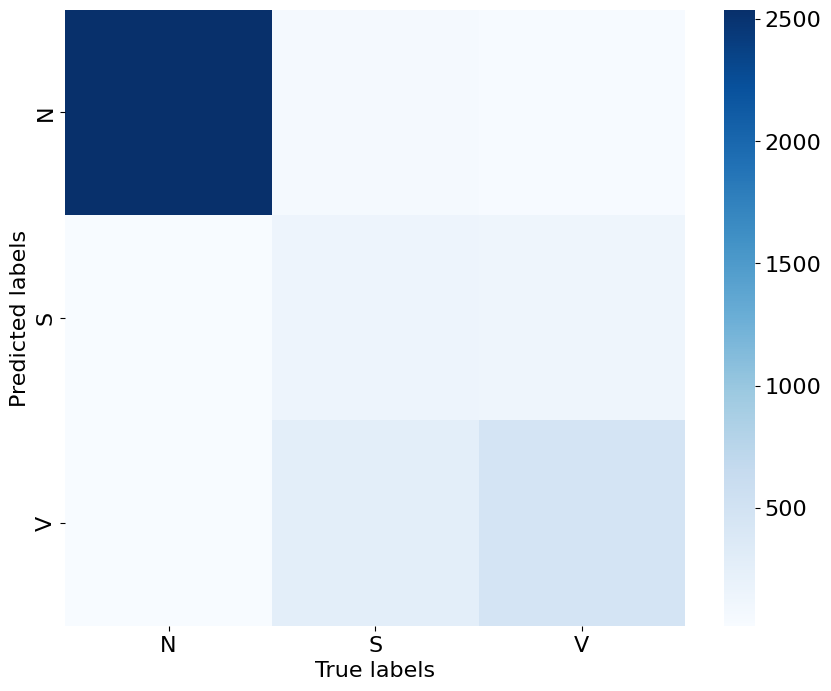

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
# Predict the test set with the 1DCNN
predictions = resNet_model.predict(normalized_val_beats)
predictions.shape

# Compute the confusion matrix
cm = confusion_matrix(np.argmax(val_beats_labels_onehot, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(val_beats_labels_onehot, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(val_beats_labels_onehot, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(val_beats_labels_onehot, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(val_beats_labels_onehot, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', xticklabels=list(label_mapping.keys()), yticklabels=list(label_mapping.keys()))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

##ROC CURVE

In [ ]:
y_pred_prob = resNet_model.predict(normalized_test_beats)

143/143 [==============================] - 1s 9ms/step


In [ ]:
y_pred_05 = (y_pred_prob > 0.62948537).astype(int)

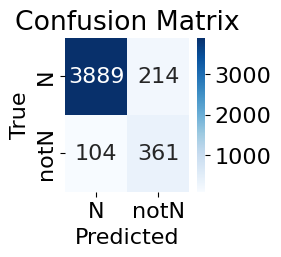

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Funzione per visualizzare la matrice di confusione
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(len(class_names), len(class_names)))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# # Valutazione del modello sulla fase di validazione
# val_predictions = resNet_model.predict(normalized_test_beats)
# val_predictions_classes = np.argmax(val_predictions, axis=1)
# val_true_classes = np.argmax(test_beats_labels_onehot, axis=1)

# Visualizzazione della matrice di confusione per la fase di validazione
plot_confusion_matrix(y_test_single, y_pred_05, class_names=["N", "notN"])
#plot_confusion_matrix(val_true_classes, val_predictions_classes, class_names=["N", "notN"])

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test_single, y_pred_prob)
roc_auc = auc(fpr, tpr)

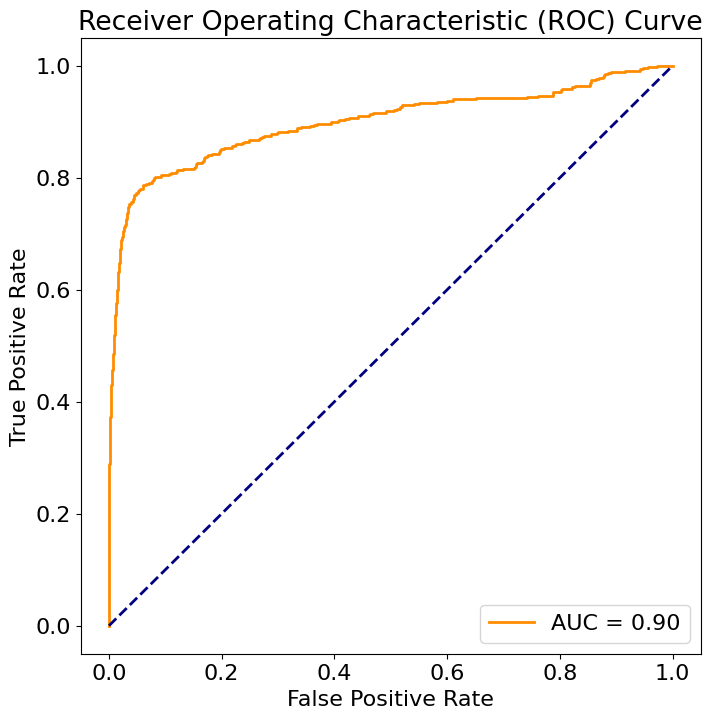

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:

optimal_threshold_index = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_threshold_index]
print(optimal_threshold)

0.61364883


In [ ]:
y_pred_optimal_threshold = (y_pred_prob > 0.4).astype(int)

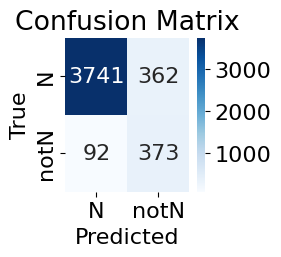

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Funzione per visualizzare la matrice di confusione
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(len(class_names), len(class_names)))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Visualizzazione della matrice di confusione per la fase di validazione
#plot_confusion_matrix(y_val_single, y_pred_optimal_threshold, class_names=["N", "S", "V"])
plot_confusion_matrix(y_test_single, y_pred_optimal_threshold, class_names=["N", "notN"])